### Исходные данные

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в
Ярославле и областных городах: Ростов Великий и Рыбинск.

### Задача  
Проанализировать клиентов регионального банка и сегментировать пользователей
по характеристикам, влияющих на отток клиентов.

### Декомпозиция 
Шаг 1. Загрузка данных
<br> 1.1 Считать CSV-файл с данными с помощью библиотеки pandas и сохранить их в датафреймы.
Путь к файлу https://code.s3.yandex.net/datasets/bank_scrooge.csv.
<br>1.2 Вывести первые строки набора данных. Изучить общую информацию о датафрейме.

Шаг 2. Предобработка данных
<br>2.1 Проверить наличие пропущенных значений и дубликатов в датафрейме. Обработать их, если такие значения присутствуют.
<br>2.2 Заменить названия столбцов и привести к нужному типу данных по необходимости.
<br>2.3 Рассмотреть распределения данных, обработать аномалии и выпадающие значения.
<br>2.4 Создать столбец с кодировкой пола и города.
<br>2.5 Задать маркер пропусков.
<br>2.6 Проверить дубликаты по id пользователю.

Шаг 3. Исследовательский анализ данных
<br>3.1 Сравнить портреты типичных клиентов банка.
<br>3.2 Расммотреть взаимсовязь между количеством продуктов пользователей и оттоком клиентов.
<br>3.3 Провести корреляционный анализ между оттоком и различными показателями, влияющими на отток клиентов.
<br>3.4 Построить матрицу корреляций.
<br>3.5Исследовать и визуализировать информацию о зависимости оттока клиентов от различных показателей.
<br>3.6 Рассмотреть распределние величин, проверить на нормальность.

Шаг 4. Проверка гипотез
<br>4.1 Сформулировать статистические гипотезы:
различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
о взаимосвязи данных с оттоком клиентов
<br>4.2 Выбрать и обосновать статистические критерии для каждой гипотезы.
<br>4.3 Проверить и интерпретировать гипотезы.

Шаг 5. Промежуточный итог
<br>5.1 Вывод о пределанной работе.
<br>5.2 Описать ряд характеристик, на основе которых будет проводиться сегментация пользователей.

Шаг 6. Сегментация пользователей
<br>6.1 Сегментировать пользователей на основе выделенных характеристик.
<br>6.2 Посчитать колиечество пользователй, долю оттока и другие показатели в каждом сегменте.
<br>6.3 Выделить максимум три сегмента, которые будут предоставлены заказчику.

Шаг 7. Вывод и рекомендации для заказчика
<br>7.1 Вывод о проделанной работе.
<br>7.2 Предоставить презентацию и дашборды.
<br>7.3 Дать рекомендации по сбору и обработке данных заказчику.
<br>7.4 Дать рекомендации по продуктам для выбранных сегментов пользователей.

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'axes.facecolor':'#f3f5f5', 'axes.grid': False, 'figure.figsize':(15,8)})
from scipy.stats import shapiro
from scipy import stats as st
from matplotlib.colors import LinearSegmentedColormap

In [2]:
path = 'bank_scrooge.csv'

In [3]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/'+path)

In [4]:
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Описание данных

- USERID — идентификатор пользователя (целое число),
- score — баллы кредитного скоринга (число с плавающей точкой),
- city — город (строка),
- gender — пол (строка),
- age — возраст (число с плавающей точкой, в данных есть пропуски),
- equity — количество баллов собственности (целое число),
- balance — баланс на счёте (число с плавающей точкой),
- products — количество продуктов, которыми пользуется клиент (целое число),
- credit_card — есть ли кредитная карта (целое число 1- есть, 0- нет),
- last_activity — активный клиент (целое число), 
- EST_SALARY — оценочный доход клиента (число с плавающей точкой),
- сhurn — признак оттока (1 - уходит, 0- остается).

### Шаг 2. Предобработка данных

Приведем столбцы к нижнему регистру и переименуем для удобства

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data = data.rename(columns={'userid' :'user_id'})

Рассмотрим распределение числовых данных.

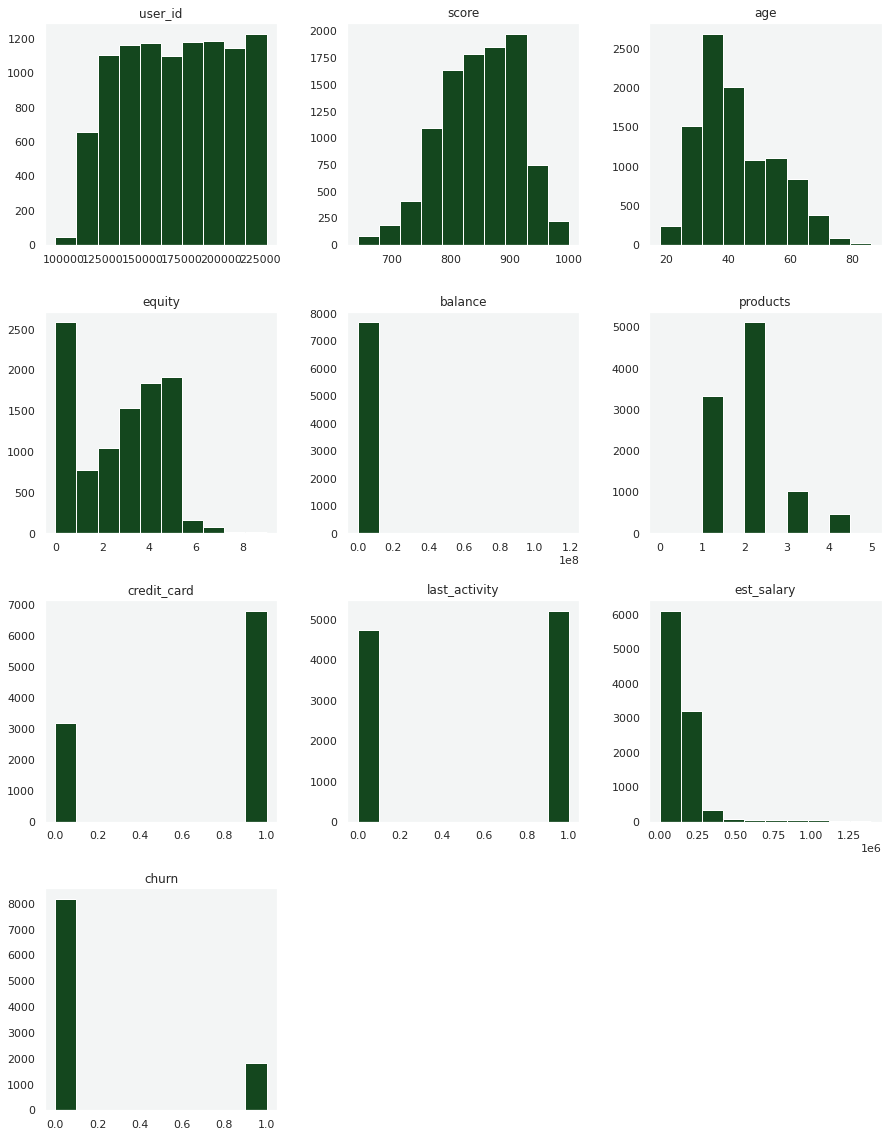

In [8]:
data.hist(figsize=(15,20), color='#14471E', grid=False)
plt.title('Распределение показателей')
plt.show()

1. Id пользователй находится в диапозоне примерно от 100000 до 225000.
2. Распредление кредитного скоринга от 600 до 10000, основное количество клиентво в диапозоне от 800 до 900.
3. Наибольшее количество клиентов возраста от 30 до 50 лет.
4. У наибольшего числа клиентов 1 балл собсвтенности.
5. Баланс всех клиентов до 200 000 000.
6. Большинство пользоватлей пользуются 2 продуктами.
7. У большинства пользователей есть кредитная крата.
8. Количесвто пользователей, которые были активны в последний месяц чуть прревышает количество неактивных пользователей в последний месяц.
9. Оценочный доход большинства клиентов до 1 000 000.
10. Примерно 20% от всех клиентов уходят.

Рассмотрим пропущенные значения.

In [9]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

У нас есть пропущенные значения в стобцах с возрастом и балансом. Чтобы определить причину пропусков, нужно понять как собирались данные. В случае, если пользователи сами предоставляли данные, данные столбцы могли быть необязательными к заполнению и пользователь мог не предоставить данные. Но, так как скорее всего наши даныне были выгружены с личных кабинетов пользователей, то могла произойти техническая ошибка при выгрузке, из-за которой могли образоваться пропуски.

Рассмотрим отдельно клиентов с пропусками в столбце возраст. Можем предположить, что пропуски в столбце с возрастом связаны с тем, что данным клиентам нет 18 лет, но в таком случае должна быть невысокая средняя зарплата, проверим так ли это.

In [10]:
data.loc[data['age'].isna()].sort_values('est_salary', ascending=False)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8449,210898,805.0,Ярославль,Ж,NaN,0,NaN,1,0,1,922080.25,0
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
8632,221197,893.0,Ярославль,М,NaN,0,NaN,1,1,0,173929.92,0
8015,198635,670.0,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0
9301,202983,942.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0


В данных с пропусками в возрасте зарплата варьируется в промежутке от 55 000 до 922 000, поэтому мы не можем утверждать, что данные клиентом возрастом меньше 18 лет. Но можем заметить, что у многих клиентов одновременно есть пропуски в данных в столбцах с возрастом и балансом.

Рассмотрим дубликаты.

In [11]:
data.duplicated().sum()

0

В явном виде строк с дубликатами нет.

Проанализируем отдельно столбец с id пользователем, так как у каждого пользователя уникальный id, то в данном столбце дубликатов быть не должно.

In [12]:
data['user_id'].min()

94561

In [13]:
data['user_id'].max()

229145

In [14]:
data.sort_values('user_id')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5462,94561,838.0,Ростов,Ж,32.0,1,377652.29,2,0,1,105665.06,1
8702,94590,869.0,Ростов,Ж,30.0,4,467040.46,1,1,1,156945.23,1
5674,95384,861.0,Ярославль,М,30.0,5,318149.94,4,1,1,57059.48,0
8129,95627,831.0,Ростов,М,25.0,6,208738.82,4,1,1,12945.28,0
9999,96267,828.0,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2373,229054,883.0,Ярославль,М,27.0,0,NaN,1,1,1,144948.73,0
5764,229058,875.0,Ярославль,М,54.0,4,3680351.98,3,0,1,173790.63,1
6059,229130,828.0,Ярославль,Ж,44.0,2,168323.87,2,1,1,163995.10,0
1234,229136,883.0,Рыбинск,Ж,38.0,3,342099.90,2,1,0,80587.26,0


Нам представлены 10000 выборочных пользователей начиная от пользователя с id - 94561, заканчивая пользователем с id 229145.

In [15]:
data['user_id'].duplicated().sum()

73

Есть 73 дубликата по id пользователю.

Рассмотрим и удалим дубликаты, в которых есть пропуски в балансе и/или возрасте

In [16]:
data.loc[(data['user_id'].duplicated()) & ((data['age'].isna()) | (data['balance'].isna()))]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1583,190253,726.0,Ярославль,М,49.0,0,NaN,1,1,1,177700.78,0
1837,210662,896.0,Рыбинск,Ж,37.0,0,NaN,2,0,0,90916.04,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0
3817,211130,918.0,Рыбинск,Ж,55.0,0,NaN,2,1,1,244202.04,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
4870,197364,889.0,Ярославль,М,33.0,0,NaN,2,1,1,96173.48,0
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
5420,126368,832.0,Рыбинск,Ж,33.0,0,NaN,1,0,0,118465.34,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0


In [17]:
data = data.drop(data.loc[(data['user_id'].duplicated()) & ((data['age'].isna()) | (data['balance'].isna()))].index).reset_index(drop=True)

Мы удалили 61 строку, что составляет 0,61% от первоначальных данных, что является не существеннойт потерей данных.

In [18]:
data['user_id'].duplicated().sum()

32

У нас осталось 32 дубликата, посмотрим на эти данные подробнее.

In [19]:
for i in data.loc[data['user_id'].duplicated()]['user_id']:
    display(data.query('user_id == @i'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
904,131419,934.0,Ярославль,М,35.0,5,2348335.95,2,0,0,217105.13,1
2136,131419,739.0,Рыбинск,Ж,37.0,3,1307941.65,3,0,0,103867.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1739,220816,840.0,Ярославль,Ж,41.0,3,1193287.13,2,1,1,76434.94,1
2299,220816,934.0,Рыбинск,Ж,74.0,5,1294285.39,3,1,0,95606.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1513,208081,873.0,Ярославль,М,31.0,2,232814.75,2,1,1,122505.86,1
2994,208081,821.0,Рыбинск,Ж,62.0,3,493608.26,2,1,1,33491.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
790,170312,901.0,Ярославль,М,33.0,4,3276783.93,3,0,1,358700.96,1
3035,170312,813.0,Рыбинск,Ж,47.0,3,370027.67,2,0,0,129835.56,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
150,185748,850.0,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
3102,185748,912.0,Ярославль,Ж,47.0,5,1598218.98,2,0,0,180256.98,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1968,217643,845.0,Ярославль,М,29.0,5,733098.45,4,1,1,41443.01,1
4181,217643,804.0,Рыбинск,Ж,40.0,2,301836.65,2,1,1,81137.22,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5361,143592,885.0,Рыбинск,Ж,56.0,4,1201087.46,2,1,1,88223.89,1
5546,143592,764.0,Ярославль,Ж,68.0,3,508919.15,2,0,1,71211.66,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2273,141265,858.0,Ярославль,М,37.0,4,471599.16,2,1,1,148806.88,1
5558,141265,811.0,Рыбинск,Ж,33.0,3,1044316.88,2,1,0,46055.32,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3346,208815,877.0,Рыбинск,М,25.0,4,239421.18,1,1,1,48638.00,1
5559,208815,773.0,Ярославль,М,39.0,4,288110.09,2,1,0,56971.91,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4605,217619,903.0,Рыбинск,Ж,59.0,5,844055.83,2,0,1,133999.76,1
5795,217619,766.0,Ярославль,М,52.0,2,218199.47,1,1,0,120356.44,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1580,208738,897.0,Рыбинск,Ж,45.0,5,859018.19,2,1,1,145510.08,1
5828,208738,839.0,Ярославль,М,60.0,5,1102438.37,2,0,1,116500.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5445,188957,853.0,Ярославль,М,35.0,1,374959.62,2,1,1,197600.97,1
5992,188957,882.0,Рыбинск,Ж,64.0,3,893392.91,3,1,0,69622.58,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
6444,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2937,172142,896.0,Ярославль,Ж,30.0,4,1009073.14,4,1,0,70866.29,1
6743,172142,751.0,Рыбинск,Ж,69.0,3,396568.03,2,0,1,45608.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3560,163207,853.0,Рыбинск,М,42.0,4,543839.62,1,1,1,105281.97,1
6773,163207,838.0,Ярославль,Ж,42.0,4,652776.60,2,1,1,97545.36,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
58,164676,860.0,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
7256,164676,790.0,Рыбинск,Ж,77.0,1,111202.01,1,1,0,32835.45,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1607,140377,802.0,Ярославль,М,26.0,3,539863.29,4,1,1,112167.83,1
7471,140377,930.0,Рыбинск,Ж,34.0,5,1123967.02,1,1,1,148336.26,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4979,210792,884.0,Рыбинск,М,48.0,4,2228037.20,2,0,1,207978.09,1
7796,210792,839.0,Ярославль,М,42.0,2,662646.97,1,1,0,138403.60,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
946,149365,877.0,Ярославль,М,41.0,5,819182.01,2,0,0,212316.47,1
8251,149365,793.0,Рыбинск,Ж,61.0,0,476496.99,2,1,1,46147.06,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8184,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8472,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7437,210627,864.0,Ярославль,Ж,38.0,4,1527225.32,4,1,1,162999.17,1
8496,210627,804.0,Рыбинск,М,30.0,2,347818.88,3,1,0,129015.25,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5618,162053,921.0,Рыбинск,М,33.0,3,857011.13,2,1,1,113512.57,1
8705,162053,786.0,Ярославль,М,29.0,4,205824.97,3,1,0,121371.73,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8559,183510,922.0,Ярославль,М,26.0,5,448542.42,3,0,1,66063.13,1
9115,183510,800.0,Рыбинск,Ж,42.0,7,473293.81,2,1,0,54049.88,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9005,200863,933.0,Рыбинск,М,29.0,7,766924.56,2,0,1,89323.33,1
9144,200863,832.0,Ярославль,М,42.0,5,620064.73,2,0,0,188054.46,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4617,217826,842.0,Ярославль,М,39.0,4,439747.65,2,0,1,116736.75,1
9371,217826,790.0,Рыбинск,Ж,46.0,4,430414.80,2,1,1,49400.37,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3931,160075,899.0,Ярославль,М,34.0,4,1647814.67,4,1,0,151888.42,1
9471,160075,824.0,Рыбинск,Ж,57.0,3,355047.33,2,0,0,64351.81,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4581,171751,874.0,Рыбинск,Ж,26.0,5,292054.42,2,0,1,20528.56,1
9614,171751,862.0,Ярославль,М,42.0,4,481992.19,2,1,0,71816.86,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2223,195884,906.0,Ярославль,М,49.0,6,1354552.83,2,0,0,270678.42,1
9620,195884,767.0,Рыбинск,Ж,45.0,1,335652.56,3,1,1,100197.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8143,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9735,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5013,168998,886.0,Ярославль,Ж,35.0,4,394780.61,2,1,1,510577.10,1
9745,168998,895.0,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7042,217412,879.0,Рыбинск,М,42.0,5,568140.15,3,0,0,231658.67,1
9839,217412,886.0,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7735,175730,846.0,Ярославль,Ж,32.0,7,216764.74,4,1,1,77100.85,1
9929,175730,816.0,Рыбинск,М,36.0,4,477892.07,3,1,0,81100.60,0


Заметим, что в дубликатах совершенно разные данные из двух городов Ярославля и Рыбинска, можем предположить, что пользователи регистрировались в данных городах одновременно и система не успевала дать им разные id. Так как в нашем датасете id пользователей не превышет 300 000, можем заменить значения дубликата на id выше, добавив перед такими значениями цифру 1, то есть id 200863 станет 1200863

In [20]:
data.loc[data['user_id'].duplicated(), 'user_id'] = data.loc[data['user_id'].duplicated(), 'user_id'] + 1000000

In [21]:
data['user_id'].duplicated().sum()

0

In [22]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                 4
equity              0
balance          2260
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Рассмотрим подробнее пропуски с балансом

In [23]:
data.loc[data['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9943,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9952,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9955,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


Заметим, что очень много пропусков в данных, где количество собственности = 0.

In [24]:
data.loc[data['balance'].isna()].query('equity == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9935,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9943,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9952,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9955,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [25]:
print('Доля таких данных' , np.round(data.loc[data['balance'].isna()].query('equity == 0').shape[0] / data.loc[data['balance'].isna()].shape[0] * 100, 2), '% от всех пропусков')

Доля таких данных 94.91 % от всех пропусков


Почти в 95% данных, где есть пропуски в балансе количество собственности 0.

Рассмотрим долю данных, в котрых есть пропуски и нет собственности от всех данных, где нет собственности.

In [26]:
print('Доля таких данных' , np.round(data.loc[data['balance'].isna()].query('equity == 0').shape[0] / data.query('equity == 0').shape[0] * 100, 2), '% от всех данных без собственности')

Доля таких данных 83.89 % от всех данных без собственности


То есть почти у 84% пользователей, у которых нет собственности, есть пропуски в балансе. 

Рассмотрим оставшиеся пропуски, где количество баллов собственности больше нуля.

In [27]:
data.loc[data['balance'].isna()].query('equity != 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
46,118927,921.0,Ярославль,Ж,72.0,1,NaN,1,1,0,253494.70,0
66,224917,737.0,Ярославль,Ж,54.0,1,NaN,1,1,0,113173.05,0
68,216960,933.0,Ярославль,М,49.0,1,NaN,1,1,1,130281.88,0
109,190714,894.0,Ярославль,Ж,48.0,1,NaN,1,1,1,231073.35,0
187,160545,726.0,Ростов,Ж,61.0,1,NaN,1,1,0,231704.73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9462,141704,699.0,Ярославль,М,59.0,1,NaN,2,1,1,181524.35,0
9476,168205,953.0,Ярославль,М,43.0,1,NaN,1,1,0,274608.39,0
9488,193976,923.0,Ярославль,М,32.0,1,NaN,1,1,0,242965.70,0
9580,146966,714.0,Рыбинск,М,32.0,1,NaN,1,1,1,142245.87,0


В этих данных взаимосвязь с пропусками в балансе не обнаружена.

Таким образом, в 95% случаях можно говорить о взаимосвязи пропусков в балансе с количеством баллов собственности = 0.

In [28]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8927,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Все дубликаты в данных id заменили, при этом осталось 4 пропуска в возрасте (удалим эти строки, так как в последствии они помешают нам при проверки гипотезы) и 2260 в балансе. Оставим эти данные без изменений. У нас также есть 1 человек, который вообще не пользуется продуктами банка.

In [29]:
data = data.drop(data.loc[data['age'].isna()].index).reset_index(drop=True)

Проверим неявные дубликаты среди названий городов.

In [30]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Все города записаны правильно.

Зададим числовой признак для столбца с полом, где М-0, а Ж-1.

In [31]:
def gender(gen):
    if gen=='М':
        return 0
    else: return 1

In [32]:
data['gender_num'] = data['gender'].apply(gender)

In [33]:
data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0
9951,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0
9952,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0
9953,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,1


Добавим категоризацию для столбца с городом.

In [34]:
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy, columns=['city'])

In [35]:
data_copy

,user_id,score,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Ростов,city_Рыбинск,city_Ярославль
0,183012,850.0,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,1,0
1,146556,861.0,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,1,0
2,120722,892.0,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866.0,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,1
4,157978,730.0,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950,120553,814.0,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0,1,0
9951,139170,894.0,М,46.0,0,NaN,1,1,0,196898.29,0,0,0,0,1
9952,115639,903.0,М,24.0,0,NaN,2,1,1,108905.09,0,0,0,0,1
9953,148700,777.0,Ж,68.0,3,865457.97,3,0,1,86874.90,0,1,0,0,1


In [36]:
data['city_Rostov'] = data_copy['city_Ростов']
data['city_Rybinsk'] = data_copy['city_Рыбинск']
data['city_Yaroslavl'] = data_copy['city_Ярославль']

In [37]:
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,0,1


Рассмотрим данные с баллами кредитного скоринга.

In [38]:
data['score'].unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

Приведем данные к целочисленному формату.

In [39]:
data['score'] = data['score'].astype('int')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9955 entries, 0 to 9954
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         9955 non-null   int64  
 1   score           9955 non-null   int64  
 2   city            9955 non-null   object 
 3   gender          9955 non-null   object 
 4   age             9955 non-null   float64
 5   equity          9955 non-null   int64  
 6   balance         7695 non-null   float64
 7   products        9955 non-null   int64  
 8   credit_card     9955 non-null   int64  
 9   last_activity   9955 non-null   int64  
 10  est_salary      9955 non-null   float64
 11  churn           9955 non-null   int64  
 12  gender_num      9955 non-null   int64  
 13  city_Rostov     9955 non-null   uint8  
 14  city_Rybinsk    9955 non-null   uint8  
 15  city_Yaroslavl  9955 non-null   uint8  
dtypes: float64(3), int64(8), object(2), uint8(3)
memory usage: 1.0+ MB


Таким образом, на данном этапе мы удалили все пропуски в столбце с возрастом, удалили некоторые дубликаты пользователей по id, заменили оставшиеся дубликаты, приписав перед номер id цифру 1, добавили категоризацию для столбца город и пол, привели к целочисленному формату столбец с кредитным скорингом.

### Шаг 3. Исследовательский анализ данных.

Сформируем портрет типичного клиента.

In [41]:
data.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
count,9.955000e+03,9955.000000,9955.000000,9955.000000,7.695000e+03,9955.000000,9955.000000,9955.000000,9.955000e+03,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,1.749854e+05,848.645706,42.743044,2.635861,8.272456e+05,1.872426,0.679960,0.522853,1.477175e+05,0.182722,0.499548,0.142240,0.268508,0.589252
std,6.646996e+04,65.375725,12.182585,1.978511,1.980327e+06,0.792773,0.466515,0.499503,1.391989e+05,0.386458,0.500025,0.349314,0.443206,0.491994
min,9.456100e+04,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.428375e+05,802.000000,33.000000,0.000000,2.956987e+05,1.000000,0.000000,0.000000,7.514512e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.728050e+05,853.000000,40.000000,3.000000,5.242953e+05,2.000000,1.000000,1.000000,1.195533e+05,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.013970e+05,900.000000,51.000000,4.000000,9.800512e+05,2.000000,1.000000,1.000000,1.744997e+05,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.228075e+06,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


В среднем у клиента
- 850 баллов кредитного скоринга
- возраст около 40 лет
- 3 балла собственности
- чуть больше 500000 на балансе счета
- пользуется 2 продуктами
- имеет кредитную карту
- пользовался продуктами банка в последнем месяце
- средняя зарплата в районе 120 000
- не уходит из банка

Рассмотрим взаимосвязь между количеством продуктов и оттоком клиентов.

In [42]:
data.groupby('churn')['products'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,8136.0,1.759833,0.713442,1.0,1.0,2.0,2.0,5.0
1,1819.0,2.376031,0.923592,0.0,2.0,2.0,3.0,5.0


В среднем, клиенты которые уходят от банка пользуются большим количеством продуктов,чем клиенты. которые остаются, но различия в значениях небольшие.

Рассмотрим распредления количественных величин.

In [43]:
columns_kol = ['score', 'age', 'balance', 'est_salary']

In [44]:
def kde():
    for i in columns_kol:
        plt.figure()
        sns.histplot(data=data, x=i, hue='churn', stat='density', common_norm=False, kde=True,
                     palette=['#14471E', '#DCA47C'])
        #sns.kdeplot(data=data, x=i, hue='churn', common_norm=False, palette=['#14471E', '#DCA47C'])
        plt.title(f'Распределение величины {i}', fontsize=18, pad=10)
        plt.xlabel(f'Парметр {i}')
        plt.ylabel('Плотность распределения')
        plt.show()

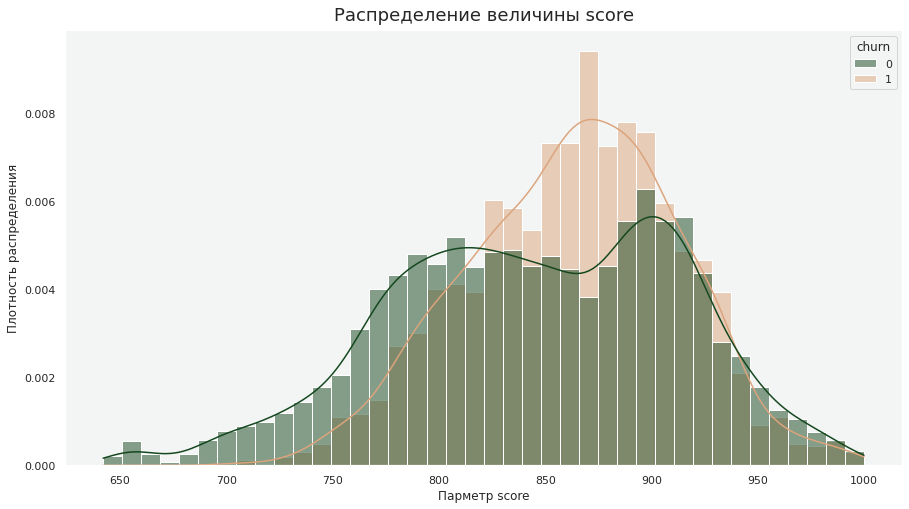

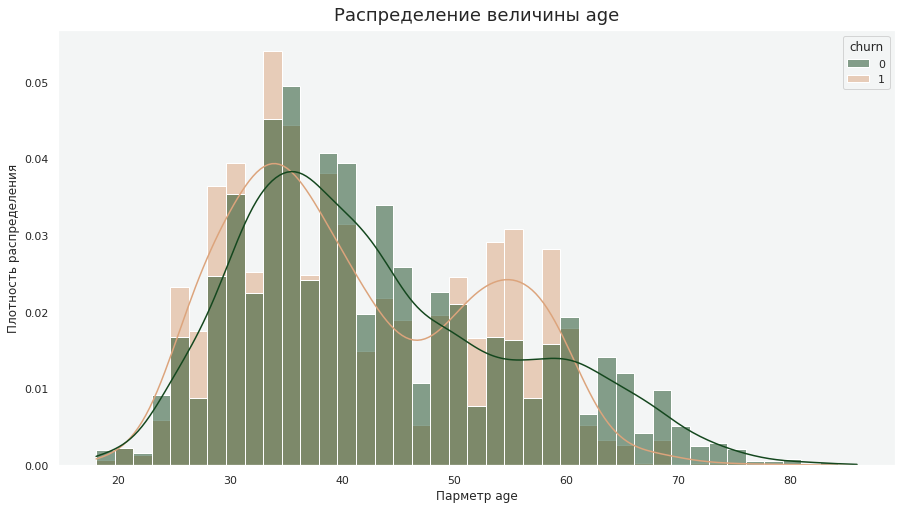

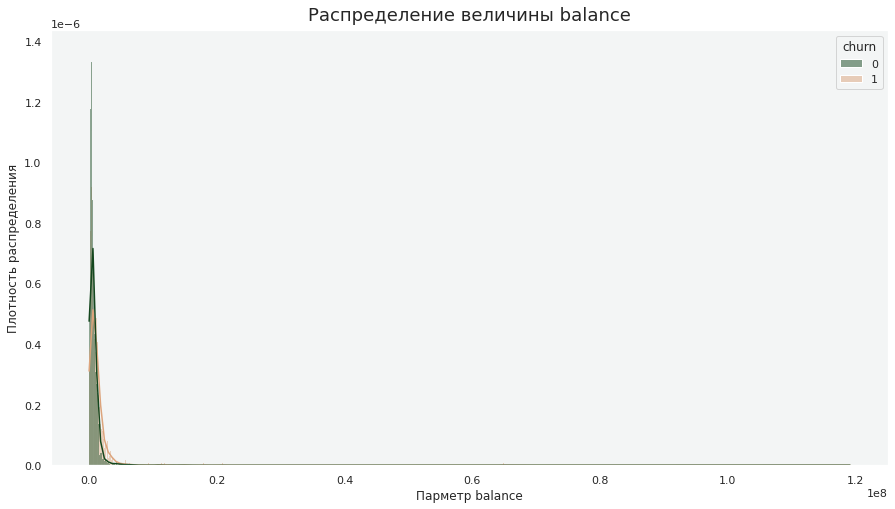

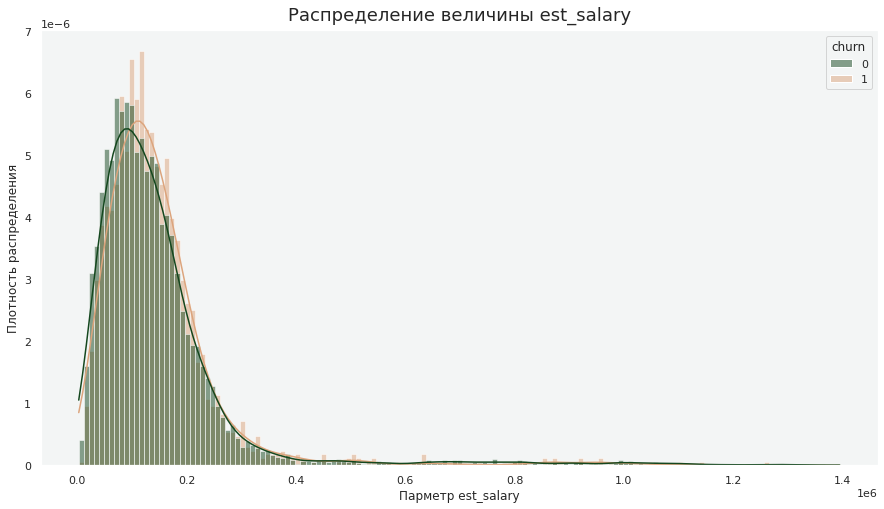

In [45]:
kde()

По графику:
- При параметре банковского скоринга от 830 до 900 вероятность клиента уйти выше, чем остаться.
- Чаще уходят клиента возраста до 30 и от 50 до 60.
- Заметим, что в данных с балансом и оценочной заработной платой есть выбросы, рассмотрим эти данные без них.

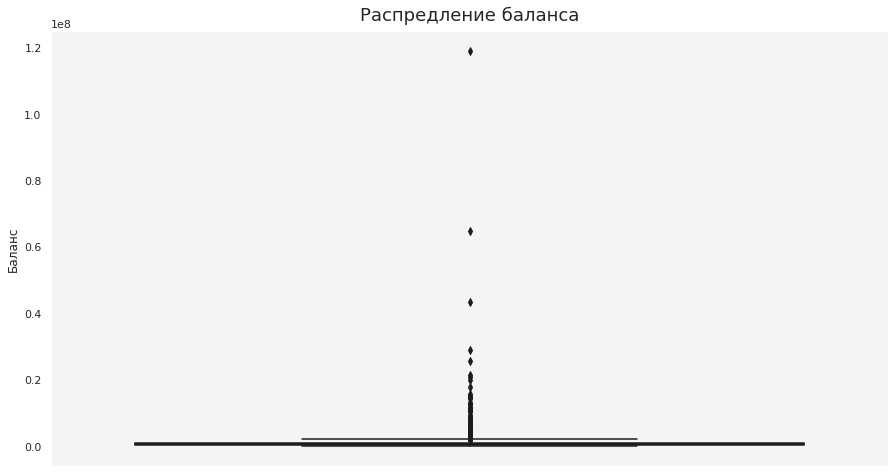

In [46]:
sns.boxplot(data = data, y='balance', color='#14471E')
plt.title('Распредление баланса', fontsize=18, pad=10)
plt.ylabel('Баланс')
plt.show()

In [47]:
data['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

Найдем 95 перцентиль.

In [48]:
data['balance'].quantile(0.95)

2114078.393999996

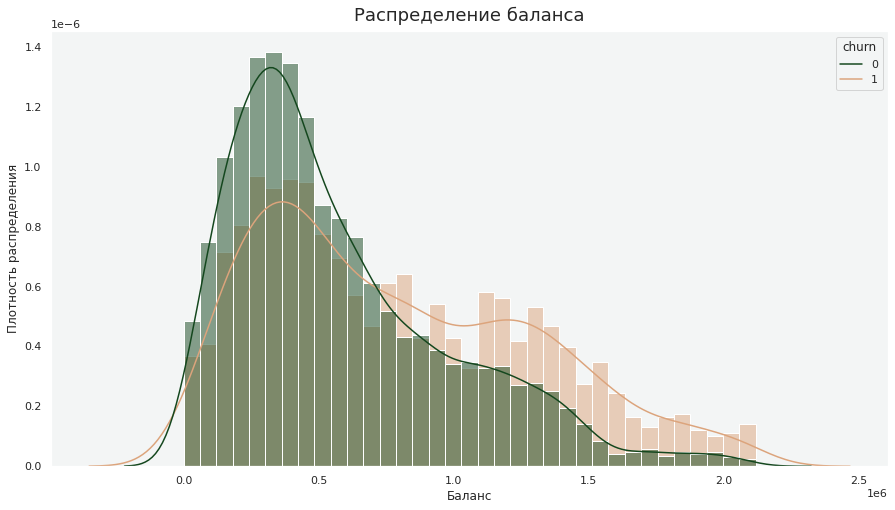

In [49]:
sns.histplot(data=data.query('balance < 2120000'), x='balance', hue='churn', stat='density', common_norm=False, palette=['#14471E', '#DCA47C'])
sns.kdeplot(data=data.query('balance < 2120000'), x='balance', hue='churn', common_norm=False, palette=['#14471E', '#DCA47C'])
plt.title('Распределение баланса', fontsize=18, pad=10)
plt.xlabel('Баланс')
plt.ylabel('Плотность распределения')
plt.show()

Пользователи чаще уходят с высоким балансом на счете.

Проделаем тоже самое с оценочным доходом пользователей.

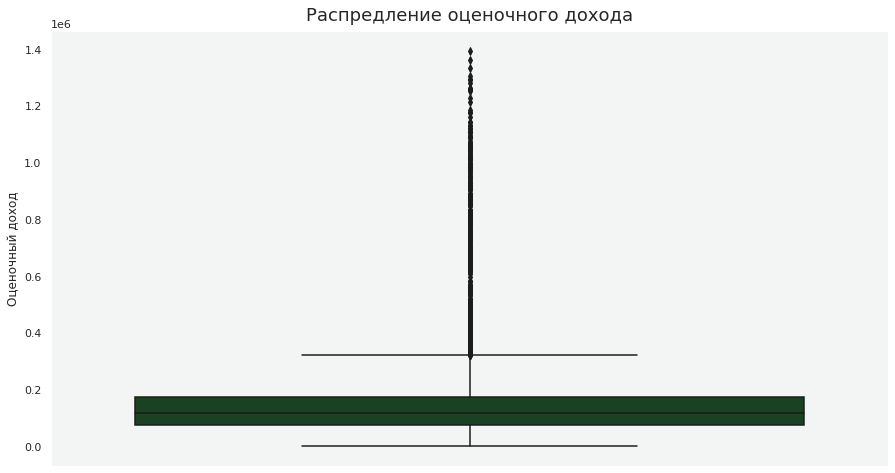

In [50]:
sns.boxplot(data = data, y='est_salary', color='#14471E')
plt.title('Распредление оценочного дохода', fontsize=18, pad=10)
plt.ylabel('Оценочный доход')
plt.show()

In [51]:
data['est_salary'].describe()

count    9.955000e+03
mean     1.477175e+05
std      1.391989e+05
min      2.546300e+03
25%      7.514512e+04
50%      1.195533e+05
75%      1.744997e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [52]:
data['est_salary'].quantile(0.95)

316354.2269999999

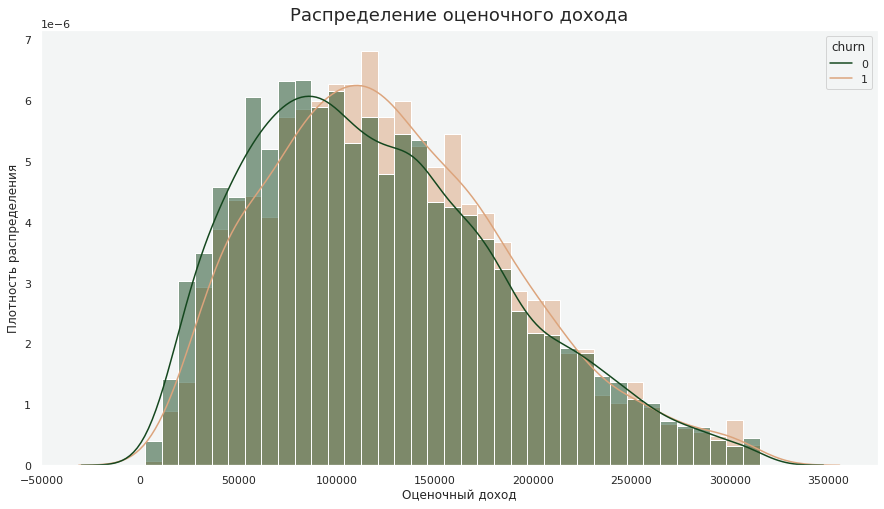

In [53]:
sns.histplot(data=data.query('est_salary < 316000'), x='est_salary', hue='churn', stat='density', common_norm=False, palette=['#14471E', '#DCA47C'])
sns.kdeplot(data=data.query('est_salary < 316000'), x='est_salary', hue='churn', common_norm=False, palette=['#14471E', '#DCA47C'])
plt.title('Распределение оценочного дохода', fontsize=18, pad=10)
plt.xlabel('Оценочный доход')
plt.ylabel('Плотность распределения')
plt.show()

Пользователи чаще уходят с высоким оценочным доходом.

Рассмотрим взаимосвязь категориальных переменных с отток клиентов.

In [54]:
columns_kat = ['city', 'gender', 'credit_card', 'last_activity', 'products', 'equity']

city,Ростов,Рыбинск,Ярославль
churn,,,
0,0.81,0.84,0.81
1,0.19,0.16,0.19


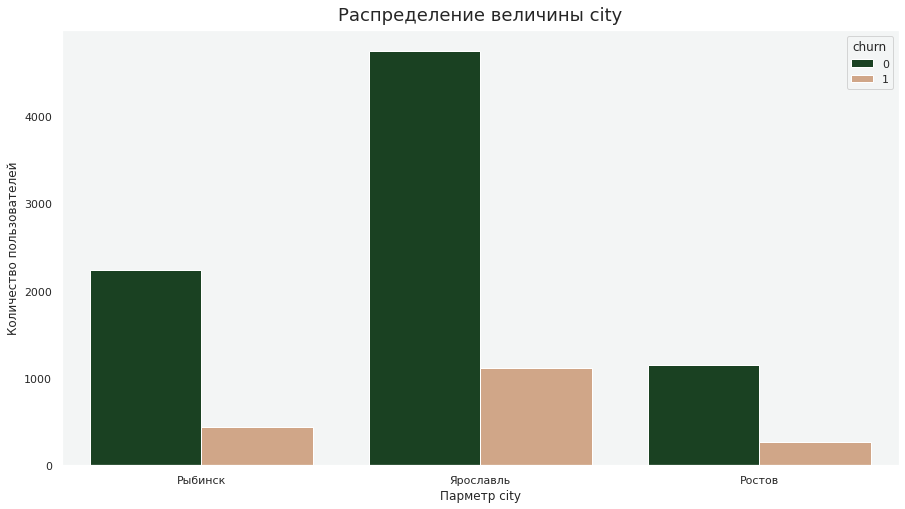

gender,Ж,М
churn,,
0,0.87,0.76
1,0.13,0.24


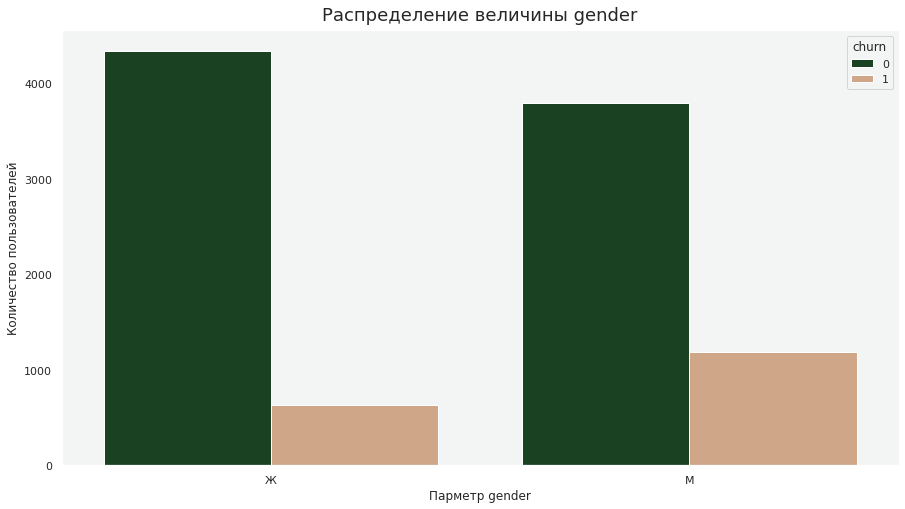

credit_card,0,1
churn,,
0,0.74,0.85
1,0.26,0.15


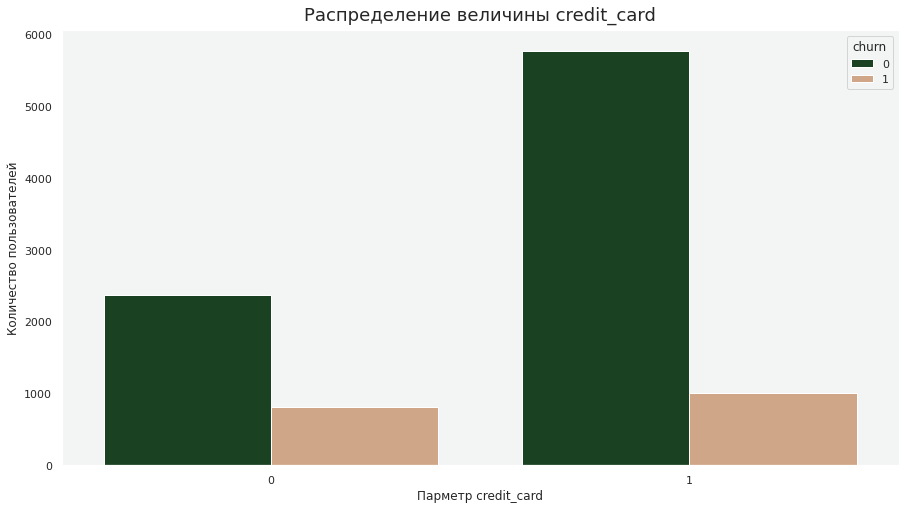

last_activity,0,1
churn,,
0,0.89,0.75
1,0.11,0.25


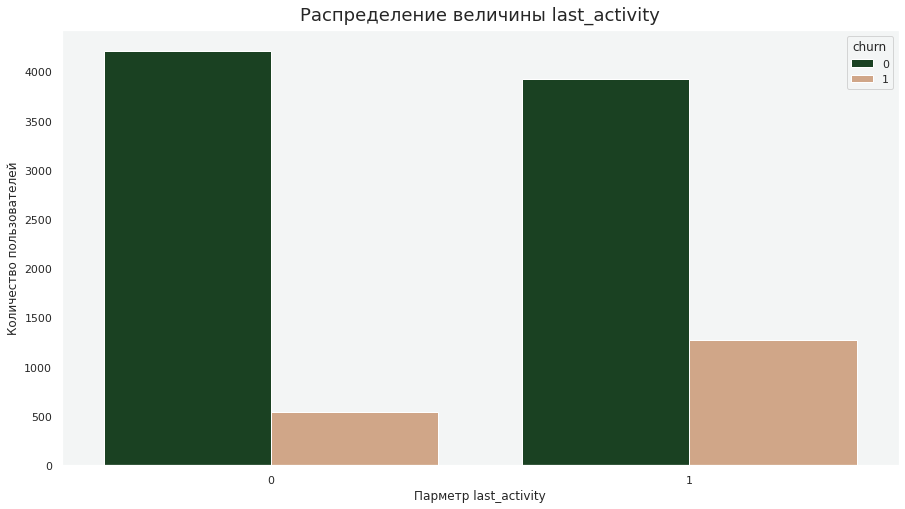

products,0,1,2,3,4,5
churn,,,,,,
0,NaN,0.93,0.81,0.71,0.37,0.58
1,1.0,0.07,0.19,0.29,0.63,0.42


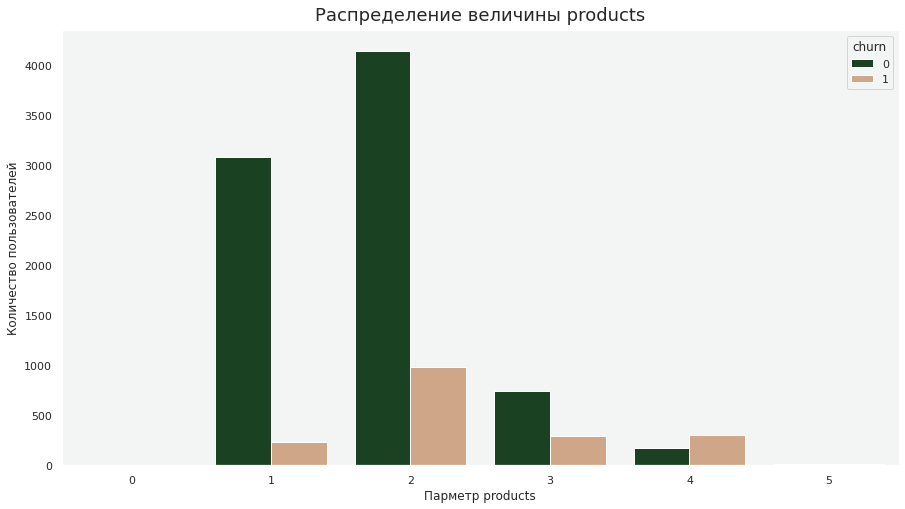

equity,0,1,2,3,4,5,6,7,8,9
churn,,,,,,,,,,
0,0.96,0.88,0.84,0.79,0.75,0.7,0.64,0.54,0.65,0.46
1,0.04,0.12,0.16,0.21,0.25,0.3,0.36,0.46,0.35,0.54


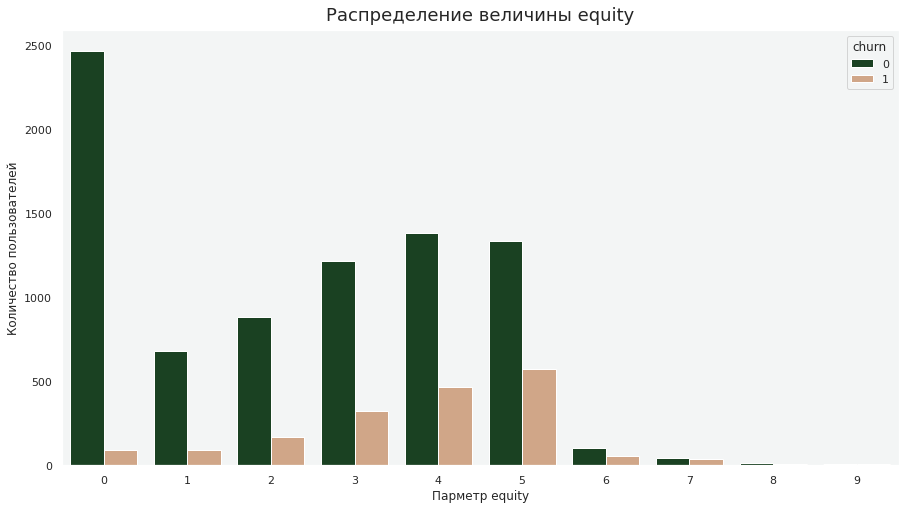

In [55]:
for i in columns_kat:
    display(np.round(data.pivot_table(index='churn', values='user_id', columns=i, aggfunc='count') / data.groupby(i)['user_id'].count().to_numpy(), 2))
    plt.figure()
    sns.countplot(data=data, x=i, hue='churn', palette=['#14471E', '#DCA47C'])
    plt.title(f'Распределение величины {i}', fontsize=18, pad=10)
    plt.xlabel(f'Парметр {i}')
    plt.ylabel('Количество пользователей')
    plt.show()

По графику:
- Больше всего пользователй из Ярославля, при этом разница в оттоке во всех городах незначительная.
- Женщин больше, чем мужчин, при этом уходят чаще мужчины.
- Пользователй с кредитной картой больше, чем без нее, при этом уходят чаще пользователи, не имевшие кредитную карту.
- Пользователи, которые были активны в последний месяц уходят чаще.
- Чаще уходят клиенты, у которых количество баллов собственности от 3.
- Чаще уходят клиенты с большим количеством продуктов в банке.

Рассмотрим корреляцию характеристик.

In [56]:
#блок try/except добавлен, потому что при рабаоте локально выдвет ошибку для корреляции нечисловых значений, 
#а при работе в среде практкума ошибка при указании numeric_only
try: 
    display(np.round(data.corr(numeric_only=True), 2))
except: 
    display(np.round(data.corr(), 2))

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
user_id,1.00,-0.02,0.03,0.01,-0.00,0.02,-0.00,-0.03,-0.02,-0.03,-0.00,-0.04,0.05,-0.02
score,-0.02,1.00,-0.01,0.07,0.24,-0.00,-0.10,-0.03,0.17,0.11,-0.01,-0.04,-0.00,0.03
age,0.03,-0.01,1.00,0.02,0.07,0.02,-0.12,-0.01,-0.04,-0.05,0.21,0.05,0.03,-0.06
equity,0.01,0.07,0.02,1.00,0.16,0.43,-0.17,-0.00,-0.17,0.27,0.02,0.03,-0.00,-0.02
balance,-0.00,0.24,0.07,0.16,1.00,0.08,-0.06,0.02,0.34,0.09,-0.05,-0.04,-0.03,0.06
products,0.02,-0.00,0.02,0.43,0.08,1.00,-0.25,0.04,-0.12,0.30,0.02,-0.01,-0.04,0.04
credit_card,-0.00,-0.10,-0.12,-0.17,-0.06,-0.25,1.00,-0.03,0.04,-0.13,-0.13,-0.10,-0.05,0.12
last_activity,-0.03,-0.03,-0.01,-0.00,0.02,0.04,-0.03,1.00,0.00,0.17,0.01,0.01,0.05,-0.05
est_salary,-0.02,0.17,-0.04,-0.17,0.34,-0.12,0.04,0.00,1.00,0.00,-0.08,-0.11,-0.06,0.13
churn,-0.03,0.11,-0.05,0.27,0.09,0.30,-0.13,0.17,0.00,1.00,-0.14,0.00,-0.03,0.02


In [57]:
colors = ["#14471E","#2A5128","#405C33","#57663D","#6D7048","#837B52", "#99855D", "#B08F67", "#C69A72", "#DCA47C"]
cmap = LinearSegmentedColormap.from_list("custom", colors, N=100)

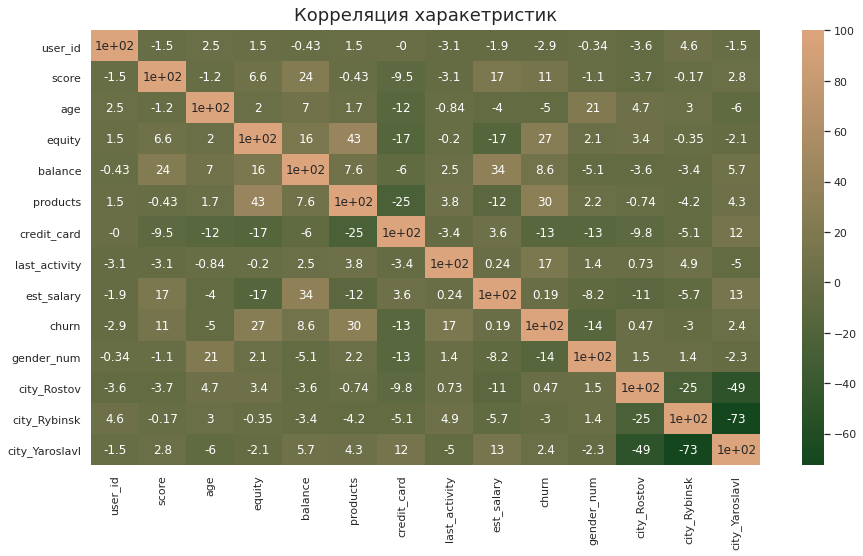

In [58]:
try:
    sns.heatmap(np.round(data.corr(numeric_only=True) * 100, 2), annot=True, cmap=cmap)
    plt.title('Корреляция харакетристик', fontsize=18, pad=10)
    plt.show() 
except: 
    sns.heatmap(np.round(data.corr() * 100, 2), annot=True, cmap=cmap)
    plt.title('Корреляция харакетристик', fontsize=18, pad=10)
    plt.show() 

Отдельно корреляция для столбца с оттоком.

In [59]:
try:
    corr_churn = np.round(data.corr(numeric_only = True) * 100 ,2)['churn'].sort_values(ascending=False).reset_index() 
    display(corr_churn.style.format(precision=2).background_gradient(cmap=cmap)) 
except: 
    corr_churn = np.round(data.corr() * 100 ,2)['churn'].sort_values(ascending=False).reset_index() 
    display(corr_churn.style.background_gradient(cmap=cmap))

,index,churn
0,churn,100.000000
1,products,30.040000
2,equity,26.940000
3,last_activity,16.960000
4,score,10.680000
5,balance,8.590000
6,city_Yaroslavl,2.390000
7,city_Rostov,0.470000
8,est_salary,0.190000
9,user_id,-2.850000


Таким образом на отток влияют следующие показатели:
- последняя активноcть пользователей
- пол 
- баллы собствнности
- количество продуктов

Проверим также гипотезы о влиянии кредитного скоринга и наличие кредитной карты.

### Шаг 4. Проверка гипотез

1. Проверим гипотезу о различии среднего возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H0 - между пользователями, которые пользуются одним продуктов и двумя нет разницы в среднем возрасте

H1 - между пользователями, которые пользуются одним продуктов и двумя есть разница в среднем возрасте

Рассмотрим распределение средних выборочных.

In [60]:
def sampling_distribution(data, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        # sample = np.random.choice(data, sample_size)
        # frac=1  - размер семплированных групп такой же как и у исходной\
        # replace=True - допустимы повторения значений
        sample = data.sample(frac=1, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

In [61]:
sample_means = sampling_distribution(data['age'], sample_size=30, n_samples=data.shape[0])

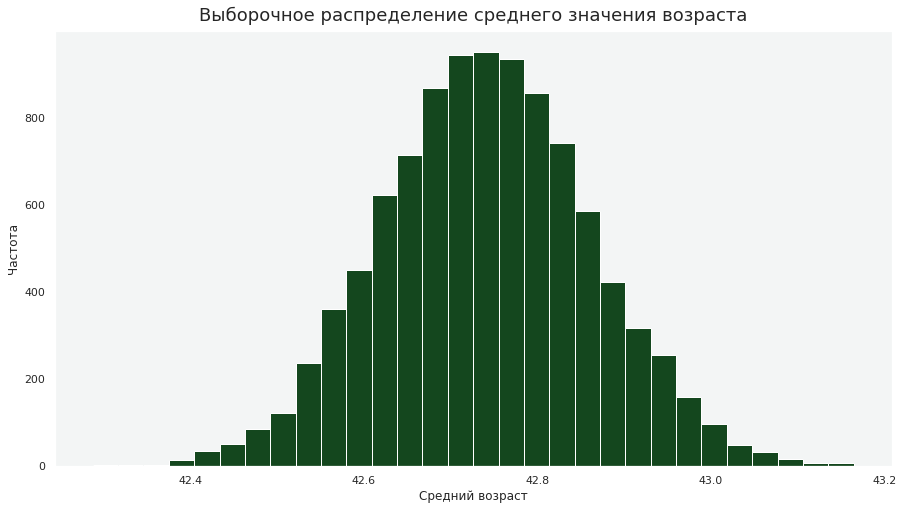

In [62]:
plt.hist(sample_means, bins=30, color='#14471E')
plt.xlabel('Средний возраст')
plt.ylabel('Частота')
plt.title('Выборочное распределение среднего значения возраста', fontsize=18, pad=10)
plt.show()

Данные на графике распределены нормально, убедимся в этом с помощью криетрия Шапиро — Уилка.

H0 - выборочные средние распределны нормально

H1 - не можем говорить о нормальном распределнии выборочных средних.

Сейчас и в дальнейшем в качестве уровня статистической значимости будем брать значение alpha = 0.05

In [63]:
if shapiro(sampling_distribution(data['age'], sample_size=30, n_samples=data.shape[0])).pvalue > 0.05:
    print('Нулевая гипотеза не может быть отклонена')
else: 
    print('Отклоняем нулевую гипотезу')

Нулевая гипотеза не может быть отклонена


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Критерий Шапиро-Уилка подтвердил нормальность распределения средних, а значит мы можем использовать ttest для анализа первоначальных гипотез.

In [64]:
if st.ttest_ind(data.query('products == 1')['age'], data.query('products == 2')['age']).pvalue < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

Отвергаем нулевую гипотезу: разница статистически значима


Нулевая гипотеза отвергнута, а значит между средним возрастом пользователей, которые пользуются одним продуктом и средним возрастом пользователей, которые пользуются двумя есть разница. .

2. Влияние кредитного скоринга на отток клиентов.

H0- между средним кредитным скоригом для уходящих и неуходящих клиентов нет разницы

H1 - есть разница, между средним кредитным скорингом для уходящих и неуходящих клиентов

In [65]:
sample_means_score = sampling_distribution(data['score'], sample_size=30, n_samples=data.shape[0])

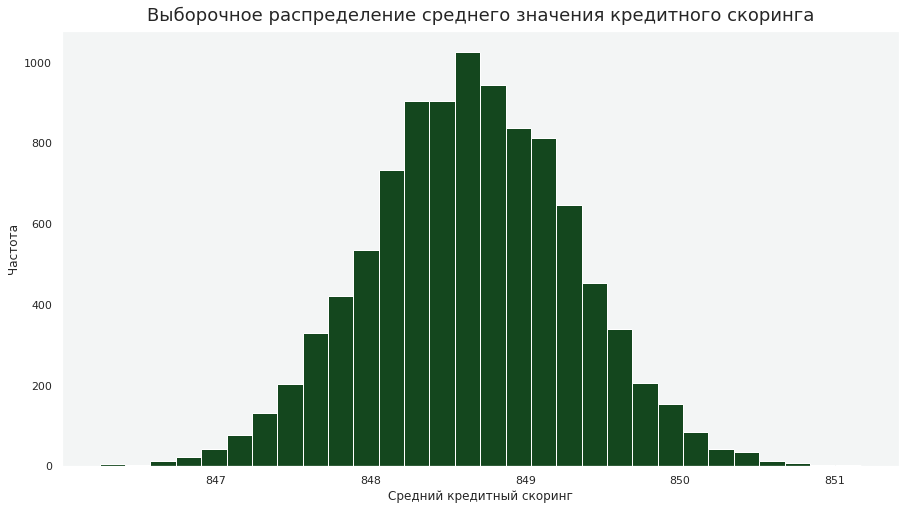

In [66]:
plt.hist(sample_means_score, bins=30, color='#14471E')
plt.xlabel('Средний кредитный скоринг')
plt.ylabel('Частота')
plt.title('Выборочное распределение среднего значения кредитного скоринга', fontsize=18, pad=10)
plt.show()

Данные на графике распределены нормально, убедимся в этом с помощью криетрия Шапиро — Уилка.

H0 - выборочные средние распределны нормально

H1 - не можем говорить о нормальном распределнии выборочных средних.

In [67]:
if shapiro(sample_means_score).pvalue > 0.05:
    print('Нулевая гипотеза не может быть отклонена')
else: 
    print('Отклоняем нулевую гипотезу')

Нулевая гипотеза не может быть отклонена


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Нулевая гипотеза не отвергнута, а значит выборочные средние распределены нормально. Поэтому для проверки первоначальных гипотез можем использовать t-тест.

In [68]:
if st.ttest_ind(data.query('churn == 0')['score'], data.query('churn == 1')['score']).pvalue < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )  

Отвергаем нулевую гипотезу: разница статистически значима


Нулевая гипотеза отвергнута, а значит кредитный скоринг влияет на отток клиентов.

3. Влияние наличия кредитной карты на отток клиентов.

H0 - наличие кредитной карты не вляиет на отток.

H1 - налчие кредитной карты влияет на отток.

Так как значение наличия кредитной карты и признак оттока являются категориальными переменнами и нам нужно проверить их взаимосвязь - можем воспользоваться хи-квадрат тестом, так как именно он применяется, когда есть предположение о связи двух переменных, выраженных с помощью категориальных шкал.

Для этого нам нужно составить таблицу из числа наблюдений для каждой ситуации.

In [69]:
df1 = data.pivot_table(index='churn', values='user_id', columns='credit_card', aggfunc='count').reset_index()
df1.columns=['churn/ credit_card', '0', '1']

In [70]:
df1['sum'] = df1['0'] + df1['1']
df1.loc['Sum'] = df1.sum()
df1

,churn/ credit_card,0,1,sum
0,0,2370,5766,8136
1,1,816,1003,1819
Sum,1,3186,6769,9955


Рассчитаем ожидаемые значения - то есть те, которые были бы в случае отсутствия различий в наличии кредитной карты (как будто различий в группах нет).

In [71]:
def table(a,b):
    return int(np.round(df1['sum'][a] * df1.loc['Sum',str(b)] / df1['sum']['Sum']))

In [72]:
value = [[table(0,0), table(1,0)], [table(0,1), table(1,1)]]

In [73]:
# Таблица ожидаемых значений
# столбцы - налчиие и отсутсви екредитной карты
# строки - показатель оттока
df2 = pd.DataFrame(value)
df2.columns=['0', '1']
df2['sum'] = df2['0'] + df2['1']
df2.loc['Sum'] = df2.sum()
df2

,0,1,sum
0,2604,582,3186
1,5532,1237,6769
Sum,8136,1819,9955


Чтобы рассчитать хи-квадрат, нам необходимо соотнести ожидаемые и наблюдаемые значения.

In [74]:
st.chisquare([2370, 5766, 816, 1003], [2604, 5532, 582, 1237])

Power_divergenceResult(statistic=169.2733293581824, pvalue=1.8261698817460864e-36)

In [75]:
if st.chisquare([2370, 5766, 816, 1003], [2604, 5532, 582, 1237]).pvalue > 0.05:
    print('Нулевая гипотеза не может быть отклонена ')
else: 
    print('Отклоняем нулевую гипотезу')

Отклоняем нулевую гипотезу


P-value составляет меньше 0.05, поэтому мы можем отвергнуть нулевую гипотезу и приходим к выводу, что между группами людей, имеющих кредитную карут и нет, есть статистически значимые различия по оттоку.

### Шаг 5.  Промежуточный итог

Таким образом на отток клиентов влияют следующие показатели:
- последняя активноcть
- кредитный скоринг
- пол
- баллы собственности
- количество продуктов
- налчиие кредитной карты

Сегментировать клиентов будем на основе этих характеристик.

### Шаг 6.  Сегментация

Рассчитаем суммарный отток клиентов.

In [76]:
np.round(data['churn'].sum() / data.shape[0] * 100, 2)

18.27

Суммарный отток клиентов 18.3%

In [77]:
data.groupby('last_activity').agg({'churn' : 'sum', 'user_id': 'count'})

,churn,user_id
last_activity,,
0,542,4750
1,1277,5205


Объединим параметры кредитного скоринга в 3 группы исходя из анализа распредления кредитного скоринга.

In [78]:
def credit(credit):
    if credit < 830:
        return 'до 830'
    elif credit >= 830 and credit <= 900:
        return 'от 830 до 900'
    else: return 'от 900 до 1000'

In [79]:
data['score_grouped'] = data['score'].apply(credit)

Объединими баллы собственности в группы

In [80]:
def equity(equity):
    if equity <= 2:
        return '0-2'
    elif equity >=3 and equity <=5:
        return '3-5'
    else: return '6-9'

In [81]:
data['equity_grouped'] = data['equity'].apply(equity)

Объединим количество продуктов в группы

In [82]:
def products(prod):
    if prod <= 1:
        return '0-1'
    elif prod == 2:
        return '2'
    elif prod == 3:
        return '3'
    else: return '4-5'

In [83]:
data['products_grouped'] = data['products'].apply(products)

Рассчитаем параметр оттока и общее количество клиентов отдельно для каждой характеристики

In [84]:
def churn_group(mas):
    for i in mas:
        d1 = data.groupby(i).agg({'churn' : 'sum', 'user_id': 'count'})
        d1['rate'] = np.round(d1['churn'] / d1['user_id'] * 100, 2)
        display(d1)

In [85]:
mas = ['last_activity', 'score_grouped', 'gender', 'equity_grouped', 'products_grouped', 'credit_card']

In [86]:
churn_group(mas)

,churn,user_id,rate
last_activity,,,
0,542,4750,11.41
1,1277,5205,24.53


,churn,user_id,rate
score_grouped,,,
до 830,466,3843,12.13
от 830 до 900,929,3701,25.10
от 900 до 1000,424,2411,17.59


,churn,user_id,rate
gender,,,
Ж,636,4973,12.79
М,1183,4982,23.75


,churn,user_id,rate
equity_grouped,,,
0-2,349,4381,7.97
3-5,1362,5303,25.68
6-9,108,271,39.85


,churn,user_id,rate
products_grouped,,,
0-1,236,3311,7.13
2,978,5114,19.12
3,297,1037,28.64
4-5,308,493,62.47


,churn,user_id,rate
credit_card,,,
0,816,3186,25.61
1,1003,6769,14.82


1 группа сегмента. 

Рассмотрим клиентов с высоким кредитным рейтингом, которые были активны в последний месяц, не имеют кредитной карты.

In [87]:
seg_1 = data.query('last_activity == 1 & score_grouped == "от 900 до 1000"  & credit_card == 0 ')
seg_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
9,133130,906,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0,1,0,0,1,от 900 до 1000,0-2,0-1
60,191602,944,Ярославль,Ж,71.0,0,NaN,2,0,1,107801.19,0,1,0,0,1,от 900 до 1000,0-2,2
76,213688,922,Ярославль,Ж,37.0,5,1214707.38,4,0,1,85121.07,0,1,0,0,1,от 900 до 1000,3-5,4-5
158,200289,906,Ярославль,Ж,47.0,4,2850862.57,2,0,1,313845.95,1,1,0,0,1,от 900 до 1000,3-5,2
161,197364,928,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1,1,0,1,0,от 900 до 1000,6-9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9732,177158,923,Рыбинск,Ж,50.0,4,582733.69,2,0,1,121352.02,0,1,0,1,0,от 900 до 1000,3-5,2
9733,148370,906,Рыбинск,Ж,30.0,5,1157856.88,2,0,1,197853.02,1,1,0,1,0,от 900 до 1000,3-5,2
9846,161917,963,Ярославль,М,27.0,4,4028889.42,2,0,1,376158.61,1,0,0,0,1,от 900 до 1000,3-5,2
9862,190839,925,Рыбинск,Ж,57.0,0,NaN,1,0,1,146407.76,0,1,0,1,0,от 900 до 1000,0-2,0-1


In [88]:
 print('Отток таких клиентов', np.round(seg_1['churn'].mean() * 100, 2), '%' )

Отток таких клиентов 41.01 %


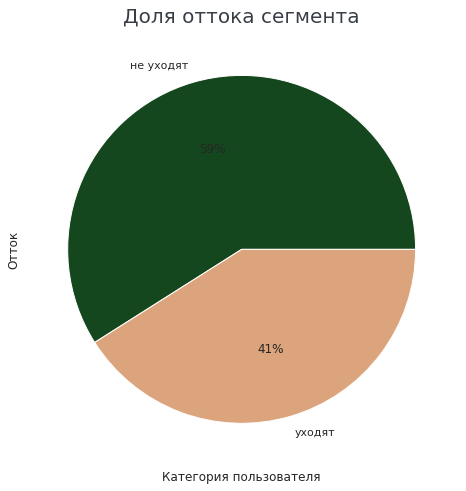

In [89]:
plt.pie(x = seg_1.groupby('churn')['user_id'].count(), labels = ['не уходят', 'уходят'], colors = ['#14471E', '#DCA47C'], autopct='%.0f%%')
plt.title('Доля оттока сегмента', color='#393E46', fontsize=20, pad=10)
plt.xlabel('Категория пользователя')
plt.ylabel('Отток')
plt.show()

In [90]:
seg_1.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
count,395.000000,395.000000,395.000000,395.000000,2.710000e+02,395.00000,395.0,395.0,3.950000e+02,395.000000,395.000000,395.000000,395.000000,395.000000
mean,168846.410127,928.756962,44.458228,2.949367,2.287396e+06,2.03038,0.0,1.0,2.199984e+05,0.410127,0.511392,0.156962,0.326582,0.516456
std,33620.616207,23.738886,13.216286,2.277114,3.733725e+06,0.83641,0.0,0.0,2.065729e+05,0.492480,0.500504,0.364226,0.469558,0.500363
min,97927.000000,901.000000,23.000000,0.000000,1.367549e+04,1.00000,0.0,1.0,3.487330e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140176.000000,910.000000,34.000000,0.000000,8.130687e+05,1.00000,0.0,1.0,1.046444e+05,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167309.000000,923.000000,42.000000,4.000000,1.348049e+06,2.00000,0.0,1.0,1.603278e+05,0.000000,1.000000,0.000000,0.000000,1.000000
75%,197022.000000,940.000000,56.000000,5.000000,2.484307e+06,2.00000,0.0,1.0,2.320159e+05,1.000000,1.000000,0.000000,1.000000,1.000000
max,229019.000000,1000.000000,86.000000,9.000000,4.327710e+07,4.00000,0.0,1.0,1.395064e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Ключевые показатели данного сегмента:
1. Высокий кредитный скоринг от 900
2. Возраст в среднем 40 лет. 
3. В среднем 4 балла собственности.
4. Баланс на карте в среднем около 1 500 000.
5. Нет кредитных карт.
6. Были активны в последнем месяце.
7. Оценочный доход выше 150 000.

Так как группа клиентов не имеет в нашем банке кредита, но при этом имеет наивысший кредитный скоринг, то може предложить им выгодные кредитные программы. 

2 группа сегмента 

Рассмотрим сегменты пользователей, у которых отток по каждой харакетристики отличается больше, чем на 5% от общего оттока.

Пользователи, которые были активны в последний месяц, имеют кредитную карту, кредитный скоринг меньше 900 и количество продуктов больше 2.

In [91]:
seg_2 = data.query('last_activity == 1 & score < 900 & products > 2 & credit_card == 1 ')
seg_2

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
33,125478,786,Ростов,Ж,27.0,3,448062.52,3,1,1,37607.67,0,1,1,0,0,до 830,3-5,3
103,128618,841,Ростов,М,29.0,1,175505.11,4,1,1,48188.69,0,0,1,0,0,от 830 до 900,0-2,4-5
208,214357,819,Ярославль,М,34.0,3,1228101.55,4,1,1,141504.44,1,0,0,0,1,до 830,3-5,4-5
283,136262,878,Ярославль,Ж,44.0,3,1151318.03,4,1,1,222976.85,1,1,0,0,1,от 830 до 900,3-5,4-5
312,166884,868,Ярославль,М,59.0,7,550601.75,4,1,1,79955.27,0,0,0,0,1,от 830 до 900,6-9,4-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9820,222895,796,Рыбинск,Ж,63.0,1,153703.49,3,1,1,144101.15,0,1,0,1,0,до 830,0-2,3
9849,157510,775,Ростов,Ж,34.0,5,1483350.04,3,1,1,94062.42,0,1,1,0,0,до 830,3-5,3
9896,223285,862,Ростов,М,46.0,3,1784723.84,4,1,1,202524.28,1,0,1,0,0,от 830 до 900,3-5,4-5
9917,217489,893,Ярославль,Ж,49.0,5,1571192.11,4,1,1,151217.99,1,1,0,0,1,от 830 до 900,3-5,4-5


In [92]:
 print('Отток таких клиентов', np.round((seg_2)['churn'].mean() * 100, 2), '%' )

Отток таких клиентов 48.39 %


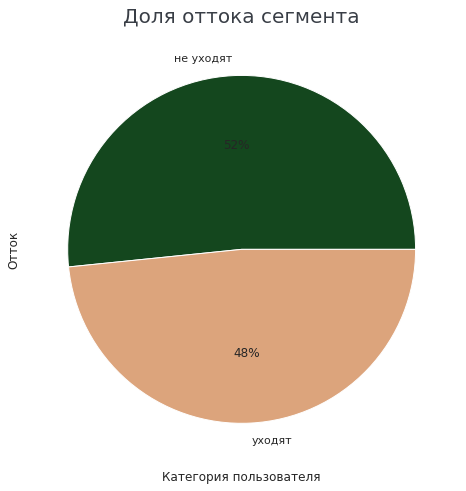

In [93]:
plt.pie(x = seg_2.groupby('churn')['user_id'].count(), labels = ['не уходят', 'уходят'], colors = ['#14471E', '#DCA47C'], autopct='%.0f%%')
plt.title('Доля оттока сегмента', color='#393E46', fontsize=20, pad=10)
plt.xlabel('Категория пользователя')
plt.ylabel('Отток')
plt.show()

In [94]:
seg_2.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
count,3.100000e+02,310.000000,310.000000,310.000000,3.090000e+02,310.000000,310.0,310.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,1.746791e+05,834.396774,40.845161,3.716129,7.228095e+05,3.687097,1.0,1.0,107635.069581,0.483871,0.387097,0.177419,0.193548,0.629032
std,6.702777e+04,40.795099,12.283671,1.585757,5.308631e+05,0.553449,0.0,0.0,90287.743682,0.500548,0.487874,0.382641,0.395718,0.483845
min,9.538400e+04,738.000000,19.000000,0.000000,7.703050e+03,3.000000,1.0,1.0,5043.140000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.478030e+05,802.000000,32.000000,3.000000,3.193090e+05,3.000000,1.0,1.0,50165.942500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.725140e+05,838.000000,38.000000,4.000000,5.717155e+05,4.000000,1.0,1.0,93835.010000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.980568e+05,868.000000,48.000000,5.000000,1.113999e+06,4.000000,1.0,1.0,138813.722500,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.195884e+06,899.000000,82.000000,9.000000,3.360245e+06,5.000000,1.0,1.0,870724.090000,1.000000,1.000000,1.000000,1.000000,1.000000


Ключевые показатели этого сегмента:
1. Кредитный скоринг от 738 до 899.
2. Средний возраст до 40 лет.
3. В среднем 4 балла собственности.
4. Баланс на счете в cреднем около 600 000.
5. Имеют кредитную карту.
6. Были активны в последний месяц.
7. Оценочный доход около 100 000.

Для таких клиентов можем предложить более выгодные кредитные условия, выгодные кредитные каникулы. Выгодные бонусы при оплате кредитной картой.

3 сегмент.
Клиенты у которых высокие баллы собственности.

In [95]:
seg_3 = data.query('equity > 5 ')
seg_3

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
56,188364,860,Ярославль,М,55.0,6,865702.41,2,1,0,76058.00,0,0,0,0,1,от 830 до 900,6-9,2
161,197364,928,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1,1,0,1,0,от 900 до 1000,6-9,2
185,117718,916,Ярославль,М,32.0,6,601574.18,2,0,1,98662.51,0,0,0,0,1,от 900 до 1000,6-9,2
203,189519,885,Рыбинск,М,62.0,7,617358.97,4,0,1,42887.04,0,0,0,1,0,от 830 до 900,6-9,4-5
204,206342,863,Ярославль,Ж,54.0,7,1011410.42,3,0,0,77581.50,0,1,0,0,1,от 830 до 900,6-9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,125463,848,Рыбинск,М,55.0,7,1534680.17,1,1,0,78161.44,1,0,0,1,0,от 830 до 900,6-9,0-1
9725,166973,850,Ярославль,Ж,30.0,6,421641.28,1,1,0,136652.91,0,1,0,0,1,от 830 до 900,6-9,0-1
9781,118814,801,Ярославль,Ж,38.0,7,336846.94,2,1,1,137726.17,0,1,0,0,1,до 830,6-9,2
9827,227649,865,Ярославль,М,51.0,6,904732.82,4,1,0,216582.58,1,0,0,0,1,от 830 до 900,6-9,4-5


In [96]:
print('Отток таких клиентов', np.round(seg_3['churn'].mean() * 100, 2), '%' )

Отток таких клиентов 39.85 %


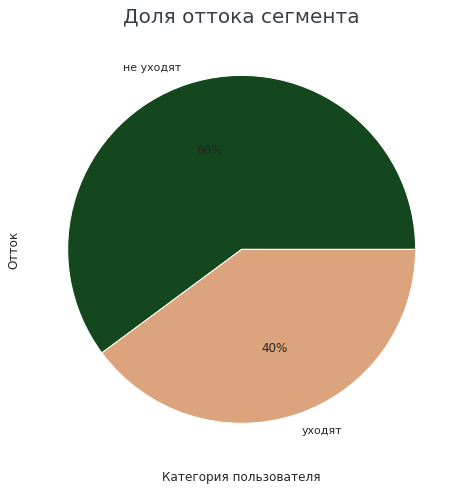

In [97]:
plt.pie(x = seg_3.groupby('churn')['user_id'].count(), labels = ['не уходят', 'уходят'], colors = ['#14471E', '#DCA47C'], autopct='%.0f%%')
plt.title('Доля оттока сегмента', color='#393E46', fontsize=20, pad=10)
plt.xlabel('Категория пользователя')
plt.ylabel('Отток')
plt.show()

In [98]:
seg_3.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl
count,2.710000e+02,271.000000,271.000000,271.000000,2.710000e+02,271.000000,271.000000,271.000000,2.710000e+02,271.000000,271.000000,271.000000,271.000000,271.000000
mean,1.776494e+05,867.468635,42.317343,6.564576,8.874796e+05,2.335793,0.586716,0.586716,1.260147e+05,0.398524,0.446494,0.169742,0.221402,0.608856
std,7.083492e+04,47.572381,12.180845,0.813360,9.630984e+05,0.963102,0.493334,0.493334,1.137855e+05,0.490500,0.498049,0.376100,0.415959,0.488909
min,9.562700e+04,746.000000,19.000000,6.000000,1.720268e+04,1.000000,0.000000,0.000000,8.894570e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.436655e+05,834.500000,32.000000,6.000000,4.431431e+05,2.000000,0.000000,0.000000,6.441724e+04,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.755410e+05,865.000000,40.000000,6.000000,6.300455e+05,2.000000,1.000000,1.000000,1.036185e+05,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.044640e+05,900.000000,51.000000,7.000000,8.914812e+05,3.000000,1.000000,1.000000,1.557767e+05,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.183510e+06,993.000000,75.000000,9.000000,8.612191e+06,4.000000,1.000000,1.000000,1.130928e+06,1.000000,1.000000,1.000000,1.000000,1.000000


Основные характеристики сегмента:
1. Разнообразный кредитный скоринг
2. Среднйи возраст 40 лет.
3. Количество баллов собственности от 6.
4. В среднем баланс выше 600 000.
5. В среднем пользуются двумя продуктами.
6. У половины есть кредитная карта.
7. Средний доход около 100 000.

Для таких клиентов можно продумать инвестиционные программы.

Заметим также группу клиентов, в которой очень низкий отток.

Женщины, которые были активны в последний месяц, имеют кредитную карту, кредитный скоринг меньше 830, имеют кредитную карту и пользуются одним или двумя продуктами (если одним, то это кредит).

In [99]:
data.query('last_activity == 1 & score < 830  & gender == "Ж" &  equity < 4 & products < 3 & credit_card == 1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
25,189712,806,Ярославль,Ж,61.0,2,288289.94,2,1,1,55366.82,0,1,0,0,1,до 830,0-2,2
64,211263,789,Ярославль,Ж,38.0,1,283932.13,2,1,1,56381.21,0,1,0,0,1,до 830,0-2,2
92,184891,826,Ростов,Ж,31.0,2,286655.30,2,1,1,75349.94,0,1,1,0,0,до 830,0-2,2
120,135127,737,Ярославль,Ж,34.0,0,NaN,2,1,1,148157.43,0,1,0,0,1,до 830,0-2,2
124,192966,686,Рыбинск,Ж,33.0,0,NaN,1,1,1,518488.59,0,1,0,1,0,до 830,0-2,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9882,193728,801,Ростов,Ж,44.0,1,159181.34,1,1,1,167274.74,0,1,1,0,0,до 830,0-2,0-1
9892,180499,688,Ярославль,Ж,39.0,0,NaN,1,1,1,161488.81,0,1,0,0,1,до 830,0-2,0-1
9908,132990,760,Ярославль,Ж,28.0,1,131814.69,1,1,1,67612.85,0,1,0,0,1,до 830,0-2,0-1
9910,135762,813,Ростов,Ж,25.0,3,76080.91,1,1,1,22538.93,0,1,1,0,0,до 830,3-5,0-1


In [100]:
print('Отток таких клиентов', np.round(data.query('last_activity == 1 & score < 800  & gender == "Ж" &  equity < 4 & products < 3 & credit_card == 1')['churn'].mean() * 100, 2), '%' )

Отток таких клиентов 0.98 %


Скорее всего таких клиентов удерживает именно налчиие кредита, но стоит также обратить внимание на эту группу, чтобы сделать похожую кредитную политику для оставшихся.

Для проверки оставшихмя групп рассмотрим данные в совокупности всех признаков, оставив первоначально данные, которые по отдельности показыввают высокий отток.

In [101]:
data1 = data.query('(score_grouped == "до 830" | score_grouped == "от 830 до 900") & products != 2 & credit_card == 0')

In [102]:
def outflow(data1):
    for i in data1['last_activity'].unique():
        for j in data1['score_grouped'].unique():
            for m in data1['gender'].unique():
                for e in data1['equity_grouped'].unique():
                    for p in data1['products_grouped'].unique():
                        for c in data1['credit_card'].unique():
                            print(f'Последняя активность = {i}, значение банковского скоринга {j}, пол {m}, количество баллов собственности {e}, количесвто продуктов {p}, наличие кредитной карты = {c}')
                            display(data1.query('last_activity == @i & score_grouped == @j & gender == @m & equity_grouped == @e & \
                           products_grouped == @p  & credit_card == @c'))
                            print('Отток', np.round(data1.query('last_activity == @i & score_grouped == @j & gender == @m & equity_grouped == @e & \
                           products_grouped == @p  & credit_card == @c')['churn'].mean() * 100, 2), '%')
                            print()
                            print()

In [103]:
outflow(data1)

Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
6,177259,807,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0,1,0,0,1,до 830,3-5,3
90,156141,788,Ярославль,Ж,40.0,3,313725.58,3,0,1,73128.09,0,1,0,0,1,до 830,3-5,3
128,141891,815,Ярославль,Ж,50.0,4,407936.79,3,0,1,89622.11,0,1,0,0,1,до 830,3-5,3
225,194723,825,Ярославль,Ж,61.0,5,1464202.67,3,0,1,69865.88,0,1,0,0,1,до 830,3-5,3
267,176442,770,Ростов,Ж,72.0,3,324048.23,3,0,1,41498.18,0,1,1,0,0,до 830,3-5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,137069,795,Ярославль,Ж,63.0,3,466604.75,3,0,1,59634.88,0,1,0,0,1,до 830,3-5,3
9719,228076,795,Ярославль,Ж,69.0,3,406504.29,3,0,1,36797.50,0,1,0,0,1,до 830,3-5,3
9734,192405,777,Ростов,Ж,63.0,5,1470087.29,3,0,1,41727.85,0,1,1,0,0,до 830,3-5,3
9884,123664,819,Ярославль,Ж,36.0,4,331403.71,3,0,1,229367.86,0,1,0,0,1,до 830,3-5,3


Отток 19.67 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
637,180902,741,Рыбинск,Ж,48.0,3,250711.37,1,0,1,150834.64,0,1,0,1,0,до 830,3-5,0-1
3403,148583,821,Ростов,Ж,41.0,5,470317.54,1,0,1,191380.04,0,1,1,0,0,до 830,3-5,0-1
3960,133930,785,Ростов,Ж,55.0,3,309195.10,1,0,1,50734.23,0,1,1,0,0,до 830,3-5,0-1
4118,188657,754,Рыбинск,Ж,63.0,3,183779.33,1,0,1,19494.05,0,1,0,1,0,до 830,3-5,0-1
4920,174354,789,Ростов,Ж,39.0,3,177945.72,1,0,1,189807.41,0,1,1,0,0,до 830,3-5,0-1
5347,222692,808,Ростов,Ж,44.0,4,1074235.90,1,0,1,126436.49,0,1,1,0,0,до 830,3-5,0-1
5959,119712,771,Рыбинск,Ж,73.0,3,580778.43,1,0,1,101422.89,0,1,0,1,0,до 830,3-5,0-1
6385,138816,824,Ростов,Ж,57.0,4,668852.50,1,0,1,70517.77,0,1,1,0,0,до 830,3-5,0-1
7628,167458,776,Ростов,Ж,35.0,5,702545.62,1,0,1,86745.86,0,1,1,0,0,до 830,3-5,0-1


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
94,191870,821,Ростов,Ж,30.0,3,157677.78,4,0,1,36397.02,0,1,1,0,0,до 830,3-5,4-5
7661,193587,829,Ярославль,Ж,41.0,4,500100.15,4,0,1,212165.82,0,1,0,0,1,до 830,3-5,4-5
8719,121857,824,Ярославль,Ж,44.0,3,317778.30,4,0,1,154044.45,0,1,0,0,1,до 830,3-5,4-5
9600,194724,821,Ярославль,Ж,34.0,5,519908.23,4,0,1,43695.07,0,1,0,0,1,до 830,3-5,4-5
9844,198329,823,Ростов,Ж,48.0,4,550575.09,4,0,1,86181.06,0,1,1,0,0,до 830,3-5,4-5
9954,96267,828,Рыбинск,Ж,58.0,3,1180886.70,4,0,1,21422.37,0,1,0,1,0,до 830,3-5,4-5


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
83,189395,792,Ярославль,Ж,66.0,1,266586.19,3,0,1,51536.94,1,1,0,0,1,до 830,0-2,3
219,161758,754,Ярославль,Ж,80.0,1,332616.82,3,0,1,114804.27,0,1,0,0,1,до 830,0-2,3
852,225060,828,Ярославль,Ж,54.0,2,1352335.92,3,0,1,310156.89,0,1,0,0,1,до 830,0-2,3
1778,217733,792,Ярославль,Ж,48.0,0,238158.57,3,0,1,89398.40,0,1,0,0,1,до 830,0-2,3
2505,133034,755,Ярославль,Ж,53.0,2,388176.01,3,0,1,45952.85,0,1,0,0,1,до 830,0-2,3
2697,157354,808,Ярославль,Ж,38.0,1,99602.49,3,0,1,399043.43,0,1,0,0,1,до 830,0-2,3
2704,202241,737,Ярославль,Ж,37.0,2,137788.59,3,0,1,93140.41,0,1,0,0,1,до 830,0-2,3
3453,118858,755,Ростов,Ж,57.0,2,850311.38,3,0,1,48439.49,0,1,1,0,0,до 830,0-2,3
3867,212817,820,Ярославль,Ж,31.0,1,198974.78,3,0,1,161494.60,0,1,0,0,1,до 830,0-2,3
3920,148259,771,Ярославль,Ж,36.0,2,135490.47,3,0,1,62552.35,0,1,0,0,1,до 830,0-2,3


Отток 4.35 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
422,222699,801,Ростов,Ж,60.0,1,174436.56,1,0,1,56466.12,0,1,1,0,0,до 830,0-2,0-1
1254,226578,788,Ростов,Ж,69.0,1,98860.39,1,0,1,14334.71,0,1,1,0,0,до 830,0-2,0-1
1816,153761,823,Рыбинск,Ж,44.0,0,NaN,1,0,1,258872.11,0,1,0,1,0,до 830,0-2,0-1
1909,224468,789,Ярославль,Ж,38.0,0,124188.28,1,0,1,94062.25,0,1,0,0,1,до 830,0-2,0-1
1956,123788,821,Рыбинск,Ж,64.0,2,214649.84,1,0,1,22690.28,0,1,0,1,0,до 830,0-2,0-1
3701,193501,820,Рыбинск,Ж,37.0,0,NaN,1,0,1,223224.23,0,1,0,1,0,до 830,0-2,0-1
4011,194018,808,Ростов,Ж,33.0,2,124736.51,1,0,1,125420.93,0,1,1,0,0,до 830,0-2,0-1
5172,210529,758,Ярославль,Ж,38.0,2,220335.09,1,0,1,40210.94,0,1,0,0,1,до 830,0-2,0-1
6148,163445,745,Рыбинск,Ж,56.0,0,6.00,1,0,1,74698.29,1,1,0,1,0,до 830,0-2,0-1
6185,167679,805,Ростов,Ж,53.0,0,NaN,1,0,1,171608.15,0,1,1,0,0,до 830,0-2,0-1


Отток 5.88 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
5182,179916,810,Ярославль,Ж,38.0,2,1499712.87,4,0,1,291146.98,1,1,0,0,1,до 830,0-2,4-5
6263,125759,823,Ярославль,Ж,29.0,0,176452.78,4,0,1,29825.60,0,1,0,0,1,до 830,0-2,4-5
8378,176375,821,Ярославль,Ж,33.0,1,250010.14,4,0,1,18329.33,0,1,0,0,1,до 830,0-2,4-5
8495,197104,802,Рыбинск,Ж,48.0,0,191193.64,4,0,1,76021.70,1,1,0,1,0,до 830,0-2,4-5


Отток 50.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1222,142100,785,Ярославль,М,36.0,4,251492.62,3,0,1,88812.49,0,0,0,0,1,до 830,3-5,3
1291,131565,826,Ярославль,М,60.0,5,737821.34,3,0,1,98134.05,1,0,0,0,1,до 830,3-5,3
2080,161912,791,Ростов,М,60.0,4,409731.39,3,0,1,29884.51,0,0,1,0,0,до 830,3-5,3
2232,178439,810,Ярославль,М,54.0,4,761640.30,3,0,1,37346.60,1,0,0,0,1,до 830,3-5,3
2570,176194,766,Ярославль,М,56.0,5,811012.63,3,0,1,55019.57,0,0,0,0,1,до 830,3-5,3
2900,212179,753,Ярославль,М,48.0,5,189031.38,3,0,1,100193.16,0,0,0,0,1,до 830,3-5,3
3000,219750,822,Ярославль,М,46.0,5,1153103.86,3,0,1,251722.30,0,0,0,0,1,до 830,3-5,3
3393,118275,765,Ярославль,М,39.0,5,696552.49,3,0,1,174454.06,0,0,0,0,1,до 830,3-5,3
3574,177149,825,Ярославль,М,51.0,4,528902.38,3,0,1,156702.95,0,0,0,0,1,до 830,3-5,3
3588,171597,758,Ярославль,М,64.0,3,395337.69,3,0,1,57553.56,0,0,0,0,1,до 830,3-5,3


Отток 20.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1061,213894,779,Ростов,М,43.0,5,924451.82,1,0,1,189425.18,0,0,1,0,0,до 830,3-5,0-1
1332,148094,793,Рыбинск,М,30.0,3,205612.89,1,0,1,79717.37,0,0,0,1,0,до 830,3-5,0-1
1522,128774,724,Ростов,М,43.0,5,490312.36,1,0,1,106831.28,0,0,1,0,0,до 830,3-5,0-1
3165,152666,817,Ростов,М,32.0,3,682016.23,1,0,1,75559.28,1,0,1,0,0,до 830,3-5,0-1
4007,221480,771,Рыбинск,М,52.0,5,816896.33,1,0,1,94703.87,0,0,0,1,0,до 830,3-5,0-1
4651,131685,813,Рыбинск,М,18.0,3,24074.10,1,0,1,20963.66,0,0,0,1,0,до 830,3-5,0-1
5066,171421,824,Ростов,М,24.0,3,94323.21,1,0,1,85928.59,0,0,1,0,0,до 830,3-5,0-1
5145,215377,748,Рыбинск,М,32.0,3,265571.61,1,0,1,72153.02,1,0,0,1,0,до 830,3-5,0-1
5699,186439,823,Ростов,М,28.0,3,237913.73,1,0,1,26971.69,0,0,1,0,0,до 830,3-5,0-1
6071,166086,788,Рыбинск,М,26.0,5,99885.68,1,0,1,9766.13,0,0,0,1,0,до 830,3-5,0-1


Отток 25.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1445,133846,820,Рыбинск,М,36.0,5,502882.96,4,0,1,112986.18,0,0,0,1,0,до 830,3-5,4-5
2774,109529,804,Ростов,М,40.0,4,746099.06,4,0,1,104425.17,1,0,1,0,0,до 830,3-5,4-5
5916,210147,825,Ростов,М,33.0,4,356520.44,4,0,1,66962.61,0,0,1,0,0,до 830,3-5,4-5
6238,99111,826,Ростов,М,60.0,5,1333343.17,4,0,1,89817.02,1,0,1,0,0,до 830,3-5,4-5
8309,229017,817,Ярославль,М,49.0,5,2616800.01,4,0,1,187543.47,1,0,0,0,1,до 830,3-5,4-5
8319,148873,825,Рыбинск,М,29.0,4,283084.37,4,0,1,44193.14,1,0,0,1,0,до 830,3-5,4-5


Отток 66.67 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1281,176993,798,Ярославль,М,68.0,1,433971.09,3,0,1,81947.49,0,0,0,0,1,до 830,0-2,3
1869,161646,770,Ярославль,М,28.0,2,221004.86,3,0,1,48776.54,0,0,0,0,1,до 830,0-2,3
1922,157304,757,Ярославль,М,34.0,0,97038.10,3,0,1,118221.85,1,0,0,0,1,до 830,0-2,3
2167,210363,806,Ярославль,М,67.0,0,249981.50,3,0,1,45571.82,1,0,0,0,1,до 830,0-2,3
2338,183094,779,Ярославль,М,30.0,0,54155.57,3,0,1,66511.36,0,0,0,0,1,до 830,0-2,3
3833,144191,809,Ярославль,М,40.0,1,259934.24,3,0,1,279168.66,1,0,0,0,1,до 830,0-2,3
4998,169629,815,Ярославль,М,34.0,0,90040.60,3,0,1,118986.90,0,0,0,0,1,до 830,0-2,3
5259,216398,790,Ярославль,М,41.0,1,128894.18,3,0,1,152608.72,1,0,0,0,1,до 830,0-2,3
5534,197137,797,Ярославль,М,33.0,2,224839.90,3,0,1,106457.39,0,0,0,0,1,до 830,0-2,3
5922,185660,814,Ярославль,М,52.0,1,156749.13,3,0,1,106218.95,0,0,0,0,1,до 830,0-2,3


Отток 26.67 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1622,155752,803,Ростов,М,47.0,2,459887.69,1,0,1,152278.20,0,0,1,0,0,до 830,0-2,0-1
2612,185113,807,Рыбинск,М,63.0,0,NaN,1,0,1,43186.13,0,0,0,1,0,до 830,0-2,0-1
2749,193453,768,Рыбинск,М,62.0,0,NaN,1,0,1,85555.63,0,0,0,1,0,до 830,0-2,0-1
4588,121703,786,Ростов,М,30.0,1,575059.18,1,0,1,118634.66,0,0,1,0,0,до 830,0-2,0-1
5167,216440,767,Ростов,М,52.0,1,287616.94,1,0,1,62922.38,0,0,1,0,0,до 830,0-2,0-1
5705,188185,787,Рыбинск,М,44.0,2,309633.19,1,0,1,65086.56,0,0,0,1,0,до 830,0-2,0-1
5819,152783,753,Ярославль,М,40.0,0,NaN,1,0,1,256876.71,0,0,0,0,1,до 830,0-2,0-1
9303,162171,829,Рыбинск,М,69.0,0,NaN,1,0,1,121156.69,0,0,0,1,0,до 830,0-2,0-1
9718,187478,818,Рыбинск,М,39.0,0,NaN,1,0,1,291726.34,0,0,0,1,0,до 830,0-2,0-1
9950,120553,814,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,0,1,0,до 830,0-2,0-1


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1735,136487,790,Рыбинск,М,30.0,0,65043.47,4,0,1,27310.47,0,0,0,1,0,до 830,0-2,4-5


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
8035,115464,805,Ростов,М,26.0,6,195622.22,3,0,1,27021.56,0,0,1,0,0,до 830,6-9,3


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
5383,156102,826,Ярославль,М,28.0,7,214989.96,4,0,1,43806.14,1,0,0,0,1,до 830,6-9,4-5


Отток 100.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
26,174396,898,Ярославль,Ж,62.0,3,364049.27,3,0,1,50661.84,0,1,0,0,1,от 830 до 900,3-5,3
151,119177,845,Ярославль,Ж,29.0,4,755670.79,3,0,1,112289.50,0,1,0,0,1,от 830 до 900,3-5,3
369,176345,863,Ярославль,Ж,44.0,3,452297.54,3,0,1,117204.12,0,1,0,0,1,от 830 до 900,3-5,3
443,207658,875,Ярославль,Ж,76.0,5,676450.87,3,0,1,11319.50,0,1,0,0,1,от 830 до 900,3-5,3
548,200440,881,Ярославль,Ж,61.0,4,741203.45,3,0,1,97929.37,0,1,0,0,1,от 830 до 900,3-5,3
847,115095,880,Ярославль,Ж,34.0,5,956027.03,3,0,1,136108.13,1,1,0,0,1,от 830 до 900,3-5,3
1166,194256,892,Ярославль,Ж,37.0,5,1182532.82,3,0,1,239069.05,1,1,0,0,1,от 830 до 900,3-5,3
1250,168696,895,Ярославль,Ж,28.0,4,709261.64,3,0,1,121559.99,1,1,0,0,1,от 830 до 900,3-5,3
1382,143947,836,Ярославль,Ж,35.0,3,449115.15,3,0,1,74213.80,1,1,0,0,1,от 830 до 900,3-5,3
3030,167512,881,Ярославль,Ж,50.0,4,511237.34,3,0,1,161387.90,1,1,0,0,1,от 830 до 900,3-5,3


Отток 63.27 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3676,219785,887,Рыбинск,Ж,29.0,4,385088.94,1,0,1,150811.70,0,1,0,1,0,от 830 до 900,3-5,0-1
4248,118002,896,Ростов,Ж,41.0,5,518520.44,1,0,1,241222.91,1,1,1,0,0,от 830 до 900,3-5,0-1
4719,168353,875,Рыбинск,Ж,37.0,4,373366.49,1,0,1,162288.62,0,1,0,1,0,от 830 до 900,3-5,0-1
5907,171403,864,Ростов,Ж,28.0,3,133985.47,1,0,1,37015.42,0,1,1,0,0,от 830 до 900,3-5,0-1
8796,182473,846,Ростов,Ж,32.0,5,397525.32,1,0,1,36479.41,0,1,1,0,0,от 830 до 900,3-5,0-1


Отток 20.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
148,122769,868,Ростов,Ж,58.0,5,1334745.59,4,0,1,63049.60,1,1,1,0,0,от 830 до 900,3-5,4-5
183,164652,880,Ярославль,Ж,35.0,5,777716.01,4,0,1,136790.96,0,1,0,0,1,от 830 до 900,3-5,4-5
216,186292,854,Рыбинск,Ж,40.0,5,824345.34,4,0,1,79888.57,0,1,0,1,0,от 830 до 900,3-5,4-5
353,145694,862,Ярославль,Ж,30.0,3,382889.10,4,0,1,45348.27,0,1,0,0,1,от 830 до 900,3-5,4-5
419,173539,894,Рыбинск,Ж,40.0,4,458658.48,4,0,1,221447.68,0,1,0,1,0,от 830 до 900,3-5,4-5
962,125090,841,Ярославль,Ж,32.0,4,372462.87,4,0,1,61366.67,0,1,0,0,1,от 830 до 900,3-5,4-5
1209,204706,849,Рыбинск,Ж,41.0,5,510595.33,4,0,1,145542.44,0,1,0,1,0,от 830 до 900,3-5,4-5
1471,123722,897,Рыбинск,Ж,37.0,4,1376513.66,4,0,1,66340.91,0,1,0,1,0,от 830 до 900,3-5,4-5
1680,167595,845,Ярославль,Ж,47.0,3,395955.39,4,0,1,74231.59,0,1,0,0,1,от 830 до 900,3-5,4-5
1690,151170,853,Ярославль,Ж,27.0,3,178810.04,4,0,1,25673.29,0,1,0,0,1,от 830 до 900,3-5,4-5


Отток 19.05 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
701,123302,857,Ярославль,Ж,64.0,1,1895509.99,3,0,1,131322.18,0,1,0,0,1,от 830 до 900,0-2,3
1401,145598,862,Ярославль,Ж,63.0,2,471527.29,3,0,1,55146.90,0,1,0,0,1,от 830 до 900,0-2,3
1405,189525,861,Ярославль,Ж,38.0,2,759193.77,3,0,1,157004.47,1,1,0,0,1,от 830 до 900,0-2,3
1746,167003,832,Ярославль,Ж,46.0,2,395500.59,3,0,1,137406.75,1,1,0,0,1,от 830 до 900,0-2,3
1890,116540,883,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1,1,0,1,0,от 830 до 900,0-2,3
2234,174918,830,Ярославль,Ж,31.0,1,598986.76,3,0,1,368696.35,0,1,0,0,1,от 830 до 900,0-2,3
2633,153806,847,Рыбинск,Ж,69.0,2,1156111.83,3,0,1,89038.72,0,1,0,1,0,от 830 до 900,0-2,3
4299,191010,842,Ярославль,Ж,76.0,0,125965.77,3,0,1,121687.48,0,1,0,0,1,от 830 до 900,0-2,3
4411,187976,873,Ярославль,Ж,37.0,1,340803.20,3,0,1,129672.90,0,1,0,0,1,от 830 до 900,0-2,3
4546,180881,836,Ярославль,Ж,40.0,2,333821.02,3,0,1,176050.29,1,1,0,0,1,от 830 до 900,0-2,3


Отток 50.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
415,225764,899,Рыбинск,Ж,26.0,0,NaN,1,0,1,196943.37,0,1,0,1,0,от 830 до 900,0-2,0-1
596,198326,891,Ярославль,Ж,53.0,0,NaN,1,0,1,88349.49,0,1,0,0,1,от 830 до 900,0-2,0-1
778,226813,881,Ростов,Ж,59.0,0,NaN,1,0,1,52578.30,0,1,1,0,0,от 830 до 900,0-2,0-1
1155,128808,888,Ярославль,Ж,68.0,0,NaN,1,0,1,82142.90,0,1,0,0,1,от 830 до 900,0-2,0-1
1216,207574,880,Ярославль,Ж,73.0,0,NaN,1,0,1,67132.05,0,1,0,0,1,от 830 до 900,0-2,0-1
1255,209660,884,Ярославль,Ж,45.0,0,NaN,1,0,1,159838.66,0,1,0,0,1,от 830 до 900,0-2,0-1
1498,118840,890,Ростов,Ж,37.0,0,NaN,1,0,1,175490.34,0,1,1,0,0,от 830 до 900,0-2,0-1
1540,163626,899,Ярославль,Ж,51.0,0,NaN,1,0,1,199045.19,0,1,0,0,1,от 830 до 900,0-2,0-1
1581,228871,889,Ярославль,Ж,59.0,0,NaN,1,0,1,155878.89,0,1,0,0,1,от 830 до 900,0-2,0-1
1983,119801,886,Ярославль,Ж,53.0,0,NaN,1,0,1,147347.29,0,1,0,0,1,от 830 до 900,0-2,0-1


Отток 2.56 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3412,151845,860,Ростов,Ж,34.0,2,1025144.73,4,0,1,90595.46,1,1,1,0,0,от 830 до 900,0-2,4-5
4790,110919,859,Ярославль,Ж,40.0,2,256242.95,4,0,1,146629.49,0,1,0,0,1,от 830 до 900,0-2,4-5


Отток 50.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
980,153716,857,Ярославль,Ж,28.0,7,317884.70,3,0,1,91543.70,1,1,0,0,1,от 830 до 900,6-9,3
3905,165682,839,Ярославль,Ж,29.0,6,355288.55,3,0,1,49100.70,0,1,0,0,1,от 830 до 900,6-9,3
4889,117404,877,Ярославль,Ж,29.0,7,394906.70,3,0,1,104978.02,1,1,0,0,1,от 830 до 900,6-9,3
9470,182150,833,Ярославль,Ж,22.0,7,79357.19,3,0,1,46243.86,0,1,0,0,1,от 830 до 900,6-9,3


Отток 50.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
2301,156036,857,Рыбинск,Ж,39.0,8,328157.6,1,0,1,101326.68,0,1,0,1,0,от 830 до 900,6-9,0-1


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
72,156677,873,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1,0,0,0,1,от 830 до 900,3-5,3
177,147950,899,Ярославль,М,37.0,4,2229215.25,3,0,1,304260.47,1,0,0,0,1,от 830 до 900,3-5,3
266,206272,862,Ярославль,М,41.0,4,1519440.16,3,0,1,221606.19,0,0,0,0,1,от 830 до 900,3-5,3
399,212030,867,Ярославль,М,59.0,5,851896.68,3,0,1,50771.03,1,0,0,0,1,от 830 до 900,3-5,3
734,170176,893,Ярославль,М,27.0,5,499315.41,3,0,1,30578.46,1,0,0,0,1,от 830 до 900,3-5,3
1080,155872,896,Ярославль,М,36.0,3,1113656.92,3,0,1,291176.85,1,0,0,0,1,от 830 до 900,3-5,3
1147,226891,864,Ярославль,М,39.0,5,920418.77,3,0,1,253390.64,1,0,0,0,1,от 830 до 900,3-5,3
1306,225322,874,Ярославль,М,40.0,4,1391610.04,3,0,1,241242.16,1,0,0,0,1,от 830 до 900,3-5,3
1419,220656,899,Ярославль,М,59.0,5,1682723.25,3,0,1,866547.65,1,0,0,0,1,от 830 до 900,3-5,3
1426,116351,833,Ярославль,М,65.0,5,854100.47,3,0,1,45480.64,1,0,0,0,1,от 830 до 900,3-5,3


Отток 75.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
35,221927,863,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,1,0,0,от 830 до 900,3-5,0-1
1577,192907,851,Рыбинск,М,39.0,4,437305.31,1,0,1,177538.75,0,0,0,1,0,от 830 до 900,3-5,0-1
1640,117653,850,Ростов,М,38.0,5,579400.11,1,0,1,168093.86,1,0,1,0,0,от 830 до 900,3-5,0-1
2459,167749,893,Ростов,М,26.0,4,1100643.27,1,0,1,118409.24,1,0,1,0,0,от 830 до 900,3-5,0-1
5229,219452,899,Рыбинск,М,68.0,5,341713.60,1,0,1,117308.56,0,0,0,1,0,от 830 до 900,3-5,0-1
5329,201453,851,Рыбинск,М,45.0,3,500334.97,1,0,1,219819.59,0,0,0,1,0,от 830 до 900,3-5,0-1
7002,224955,851,Рыбинск,М,38.0,5,1517283.99,1,0,1,141750.47,0,0,0,1,0,от 830 до 900,3-5,0-1
8204,187767,898,Ростов,М,50.0,4,1128569.84,1,0,1,230491.05,1,0,1,0,0,от 830 до 900,3-5,0-1
9254,100920,832,Ростов,М,27.0,4,142195.91,1,0,1,60049.03,1,0,1,0,0,от 830 до 900,3-5,0-1
9928,120403,859,Рыбинск,М,37.0,3,410112.86,1,0,1,103821.40,0,0,0,1,0,от 830 до 900,3-5,0-1


Отток 40.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
81,223978,850,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1,0,0,1,0,от 830 до 900,3-5,4-5
936,134107,848,Ростов,М,26.0,5,218655.27,4,0,1,21935.66,1,0,1,0,0,от 830 до 900,3-5,4-5
1070,211100,894,Рыбинск,М,38.0,5,537515.53,4,0,1,68893.74,0,0,0,1,0,от 830 до 900,3-5,4-5
1170,183521,859,Ростов,М,58.0,4,562891.64,4,0,1,47893.71,0,0,1,0,0,от 830 до 900,3-5,4-5
1358,211130,833,Ярославль,М,55.0,3,1231184.90,4,0,1,187758.38,1,0,0,0,1,от 830 до 900,3-5,4-5
1457,170200,865,Ярославль,М,28.0,5,446123.42,4,0,1,36679.45,0,0,0,0,1,от 830 до 900,3-5,4-5
1733,179892,846,Рыбинск,М,62.0,4,356362.92,4,0,1,58992.85,1,0,0,1,0,от 830 до 900,3-5,4-5
2710,165357,872,Ярославль,М,32.0,3,712738.10,4,0,1,45268.87,0,0,0,0,1,от 830 до 900,3-5,4-5
2756,127322,865,Рыбинск,М,42.0,5,1270953.75,4,0,1,121503.25,0,0,0,1,0,от 830 до 900,3-5,4-5
2812,144563,835,Ростов,М,47.0,5,398502.32,4,0,1,185665.48,0,0,1,0,0,от 830 до 900,3-5,4-5


Отток 32.26 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1742,192978,887,Ярославль,М,57.0,0,NaN,3,0,1,174360.60,0,0,0,0,1,от 830 до 900,0-2,3
6526,198474,898,Ярославль,М,53.0,0,NaN,3,0,1,153254.85,0,0,0,0,1,от 830 до 900,0-2,3
9329,177586,843,Ярославль,М,68.0,2,262533.42,3,0,1,20805.64,0,0,0,0,1,от 830 до 900,0-2,3


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
368,132300,897,Ярославль,М,34.0,0,NaN,1,0,1,204899.45,0,0,0,0,1,от 830 до 900,0-2,0-1
511,153474,899,Ярославль,М,49.0,0,NaN,1,0,1,173879.98,0,0,0,0,1,от 830 до 900,0-2,0-1
630,198833,897,Рыбинск,М,28.0,1,NaN,1,0,1,149818.43,0,0,0,1,0,от 830 до 900,0-2,0-1
681,210407,891,Рыбинск,М,51.0,0,NaN,1,0,1,220164.49,0,0,0,1,0,от 830 до 900,0-2,0-1
683,163740,874,Ярославль,М,45.0,0,NaN,1,0,1,101453.14,0,0,0,0,1,от 830 до 900,0-2,0-1
974,129508,881,Ярославль,М,47.0,0,NaN,1,0,1,142176.24,0,0,0,0,1,от 830 до 900,0-2,0-1
1392,206082,878,Рыбинск,М,32.0,0,NaN,1,0,1,132149.91,0,0,0,1,0,от 830 до 900,0-2,0-1
1416,207637,881,Ярославль,М,38.0,0,NaN,1,0,1,159421.26,0,0,0,0,1,от 830 до 900,0-2,0-1
1429,202880,878,Ярославль,М,43.0,0,NaN,1,0,1,203459.17,0,0,0,0,1,от 830 до 900,0-2,0-1
1567,138582,883,Ростов,М,34.0,0,NaN,1,0,1,151361.49,0,0,1,0,0,от 830 до 900,0-2,0-1


Отток 0.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
2374,123828,865,Рыбинск,М,33.0,2,231489.18,4,0,1,100072.25,1,0,0,1,0,от 830 до 900,0-2,4-5
6233,168678,852,Ярославль,М,30.0,2,892522.19,4,0,1,60260.96,0,0,0,0,1,от 830 до 900,0-2,4-5


Отток 50.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3071,138547,887,Ярославль,М,35.0,6,475768.04,3,0,1,194435.25,1,0,0,0,1,от 830 до 900,6-9,3
6025,228797,895,Ярославль,М,48.0,6,2917343.54,3,0,1,156805.14,1,0,0,0,1,от 830 до 900,6-9,3
6999,202077,868,Ярославль,М,37.0,6,818763.06,3,0,1,255741.91,1,0,0,0,1,от 830 до 900,6-9,3


Отток 100.0 %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 1, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
203,189519,885,Рыбинск,М,62.0,7,617358.97,4,0,1,42887.04,0,0,0,1,0,от 830 до 900,6-9,4-5
1818,151739,868,Рыбинск,М,33.0,6,669230.15,4,0,1,55280.52,1,0,0,1,0,от 830 до 900,6-9,4-5
5385,165534,846,Рыбинск,М,38.0,6,603585.35,4,0,1,160691.61,1,0,0,1,0,от 830 до 900,6-9,4-5
6279,157891,844,Ростов,М,33.0,6,272848.51,4,0,1,55339.24,0,0,1,0,0,от 830 до 900,6-9,4-5
6470,225731,860,Ярославль,М,52.0,8,947578.39,4,0,1,109984.16,1,0,0,0,1,от 830 до 900,6-9,4-5
8860,226885,900,Ярославль,М,35.0,6,2243654.20,4,0,1,234856.80,1,0,0,0,1,от 830 до 900,6-9,4-5


Отток 66.67 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
133,196162,763,Ростов,Ж,38.0,3,193372.31,3,0,0,130947.42,0,1,1,0,0,до 830,3-5,3
493,216678,807,Ярославль,Ж,27.0,5,241216.39,3,0,0,45240.95,0,1,0,0,1,до 830,3-5,3
526,123747,794,Ярославль,Ж,36.0,4,399011.15,3,0,0,53770.50,0,1,0,0,1,до 830,3-5,3
768,161032,809,Ярославль,Ж,59.0,3,330650.78,3,0,0,79769.70,0,1,0,0,1,до 830,3-5,3
812,155743,811,Рыбинск,Ж,35.0,4,1409241.28,3,0,0,155581.33,0,1,0,1,0,до 830,3-5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,123826,769,Ярославль,Ж,30.0,3,755323.27,3,0,0,141648.98,0,1,0,0,1,до 830,3-5,3
9103,176106,777,Рыбинск,Ж,41.0,5,1476095.72,3,0,0,204329.45,0,1,0,1,0,до 830,3-5,3
9566,224288,800,Ярославль,Ж,57.0,3,1183604.96,3,0,0,137771.73,0,1,0,0,1,до 830,3-5,3
9723,213607,820,Рыбинск,Ж,63.0,4,1424546.34,3,0,0,36461.98,0,1,0,1,0,до 830,3-5,3


Отток 10.61 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
2390,200748,799,Ростов,Ж,57.0,4,458260.58,1,0,0,51072.01,0,1,1,0,0,до 830,3-5,0-1
2868,154488,774,Рыбинск,Ж,40.0,3,438622.70,1,0,0,93808.86,0,1,0,1,0,до 830,3-5,0-1
3630,198507,789,Рыбинск,Ж,52.0,5,1398597.82,1,0,0,138995.98,0,1,0,1,0,до 830,3-5,0-1
6211,133436,778,Ярославль,Ж,51.0,3,234170.75,1,0,0,99759.24,0,1,0,0,1,до 830,3-5,0-1
8612,222985,760,Рыбинск,Ж,50.0,4,319668.14,1,0,0,67099.82,0,1,0,1,0,до 830,3-5,0-1
8686,182461,776,Рыбинск,Ж,37.0,4,465487.65,1,0,0,112674.39,0,1,0,1,0,до 830,3-5,0-1


Отток 0.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
459,152362,746,Ярославль,Ж,35.0,0,288840.90,3,0,0,76213.86,0,1,0,0,1,до 830,0-2,3
471,167069,817,Ростов,Ж,62.0,2,133886.03,3,0,0,22679.83,0,1,1,0,0,до 830,0-2,3
789,119046,792,Ярославль,Ж,45.0,2,572860.76,3,0,0,100873.85,0,1,0,0,1,до 830,0-2,3
1369,137223,775,Рыбинск,Ж,62.0,2,1379883.00,3,0,0,96042.32,0,1,0,1,0,до 830,0-2,3
1865,192126,778,Рыбинск,Ж,44.0,1,286644.65,3,0,0,106272.39,0,1,0,1,0,до 830,0-2,3
2299,187834,814,Ярославль,Ж,71.0,2,1251469.58,3,0,0,58224.07,0,1,0,0,1,до 830,0-2,3
2396,117043,749,Ярославль,Ж,34.0,2,452157.70,3,0,0,42693.65,0,1,0,0,1,до 830,0-2,3
2511,214541,829,Ярославль,Ж,35.0,0,269567.28,3,0,0,96907.12,0,1,0,0,1,до 830,0-2,3
2919,115244,759,Ростов,Ж,36.0,2,772311.94,3,0,0,131983.82,0,1,1,0,0,до 830,0-2,3
3265,136189,794,Ярославль,Ж,53.0,1,820398.23,3,0,0,80258.28,0,1,0,0,1,до 830,0-2,3


Отток 3.7 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1293,182310,777,Рыбинск,Ж,53.0,1,222325.04,1,0,0,89164.49,0,1,0,1,0,до 830,0-2,0-1
1304,167974,753,Ярославль,Ж,59.0,0,185951.25,1,0,0,40461.62,1,1,0,0,1,до 830,0-2,0-1
1925,123228,795,Ростов,Ж,51.0,0,245984.43,1,0,0,101552.67,1,1,1,0,0,до 830,0-2,0-1
4673,176007,781,Ярославль,Ж,61.0,1,126950.21,1,0,0,32913.23,1,1,0,0,1,до 830,0-2,0-1
5301,208259,762,Ростов,Ж,38.0,0,255334.85,1,0,0,44291.14,0,1,1,0,0,до 830,0-2,0-1
5580,127471,819,Рыбинск,Ж,61.0,0,NaN,1,0,0,53223.12,0,1,0,1,0,до 830,0-2,0-1
6317,175206,724,Рыбинск,Ж,68.0,1,177150.52,1,0,0,62546.99,0,1,0,1,0,до 830,0-2,0-1
7955,133443,814,Ярославль,Ж,51.0,0,NaN,1,0,0,202276.66,0,1,0,0,1,до 830,0-2,0-1
9226,206008,820,Рыбинск,Ж,56.0,0,NaN,1,0,0,265594.17,0,1,0,1,0,до 830,0-2,0-1
9526,129797,806,Ростов,Ж,56.0,0,NaN,1,0,0,135832.82,0,1,1,0,0,до 830,0-2,0-1


Отток 27.27 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
7023,165386,789,Ярославль,Ж,59.0,0,40270.84,4,0,0,134315.28,1,1,0,0,1,до 830,0-2,4-5


Отток 100.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
2296,175349,763,Рыбинск,Ж,69.0,6,526313.76,3,0,0,15917.94,0,1,0,1,0,до 830,6-9,3


Отток 0.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга до 830, пол Ж, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
237,187043,827,Ярославль,М,69.0,5,1024786.60,3,0,0,85853.26,1,0,0,0,1,до 830,3-5,3
1123,188684,743,Ярославль,М,56.0,3,640748.52,3,0,0,72941.35,0,0,0,0,1,до 830,3-5,3
1243,157449,817,Ярославль,М,35.0,3,1290957.29,3,0,0,102168.28,1,0,0,0,1,до 830,3-5,3
1253,173425,802,Ростов,М,37.0,4,881627.56,3,0,0,71765.83,0,0,1,0,0,до 830,3-5,3
1415,203239,773,Ярославль,М,45.0,3,414414.15,3,0,0,157330.84,0,0,0,0,1,до 830,3-5,3
1739,188513,828,Рыбинск,М,46.0,4,621450.81,3,0,0,161900.46,0,0,0,1,0,до 830,3-5,3
1921,187973,774,Ярославль,М,49.0,4,581047.68,3,0,0,70789.26,0,0,0,0,1,до 830,3-5,3
2850,153735,817,Рыбинск,М,35.0,4,538666.00,3,0,0,88106.21,0,0,0,1,0,до 830,3-5,3
2898,149396,828,Ростов,М,38.0,4,423794.36,3,0,0,104334.00,0,0,1,0,0,до 830,3-5,3
4009,215815,794,Ярославль,М,40.0,5,1203309.42,3,0,0,79656.12,0,0,0,0,1,до 830,3-5,3


Отток 16.67 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3319,216416,755,Рыбинск,М,28.0,4,630419.83,1,0,0,53847.01,0,0,0,1,0,до 830,3-5,0-1
4206,178879,799,Ростов,М,34.0,4,311644.00,1,0,0,105299.84,0,0,1,0,0,до 830,3-5,0-1
4459,227618,766,Рыбинск,М,34.0,3,245050.26,1,0,0,96344.82,0,0,0,1,0,до 830,3-5,0-1
8508,166074,778,Ростов,М,55.0,5,593256.65,1,0,0,105408.90,1,0,1,0,0,до 830,3-5,0-1


Отток 25.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
597,162267,806,Ярославль,М,47.0,2,1201280.89,3,0,0,76941.56,0,0,0,0,1,до 830,0-2,3
1356,139415,787,Ярославль,М,32.0,2,201018.34,3,0,0,97114.83,0,0,0,0,1,до 830,0-2,3
1952,192102,763,Ярославль,М,43.0,2,268198.79,3,0,0,83119.55,1,0,0,0,1,до 830,0-2,3
3044,188947,796,Ростов,М,55.0,2,1138397.04,3,0,0,52261.73,1,0,1,0,0,до 830,0-2,3
3085,223666,789,Ярославль,М,25.0,0,47055.00,3,0,0,49134.97,1,0,0,0,1,до 830,0-2,3
3124,134628,772,Ярославль,М,41.0,2,964169.62,3,0,0,144091.17,0,0,0,0,1,до 830,0-2,3
3368,143291,792,Ярославль,М,41.0,1,105794.82,3,0,0,222184.09,0,0,0,0,1,до 830,0-2,3
3629,183115,781,Ярославль,М,27.0,1,592501.20,3,0,0,128243.53,0,0,0,0,1,до 830,0-2,3
4564,165873,796,Ярославль,М,60.0,1,210475.00,3,0,0,74039.59,1,0,0,0,1,до 830,0-2,3
6974,138559,761,Ярославль,М,49.0,2,523905.65,3,0,0,108450.50,0,0,0,0,1,до 830,0-2,3


Отток 28.57 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
40,129705,811,Рыбинск,М,34.0,2,129799.35,1,0,0,96242.71,1,0,0,1,0,до 830,0-2,0-1
519,151482,829,Ростов,М,33.0,1,110123.48,1,0,0,55862.00,0,0,1,0,0,до 830,0-2,0-1
4199,200414,781,Ярославль,М,50.0,1,274607.96,1,0,0,126255.35,1,0,0,0,1,до 830,0-2,0-1
5359,226795,775,Ростов,М,45.0,1,65097.40,1,0,0,135150.61,0,0,1,0,0,до 830,0-2,0-1
5526,145039,788,Рыбинск,М,35.0,0,NaN,1,0,0,190101.79,0,0,0,1,0,до 830,0-2,0-1
7875,145810,822,Ярославль,М,40.0,0,NaN,1,0,0,217616.22,0,0,0,0,1,до 830,0-2,0-1
9101,140672,809,Рыбинск,М,49.0,2,408193.46,1,0,0,128721.62,0,0,0,1,0,до 830,0-2,0-1
9132,178111,787,Рыбинск,М,66.0,2,659115.77,1,0,0,32171.83,0,0,0,1,0,до 830,0-2,0-1
9830,139799,785,Рыбинск,М,25.0,0,NaN,1,0,0,56599.92,0,0,0,1,0,до 830,0-2,0-1


Отток 22.22 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
4866,134030,810,Ярославль,М,39.0,1,173617.37,4,0,0,162484.35,1,0,0,0,1,до 830,0-2,4-5


Отток 100.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
7158,167056,775,Ярославль,М,28.0,6,486656.69,3,0,0,27157.4,0,0,0,0,1,до 830,6-9,3


Отток 0.0 %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга до 830, пол М, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
311,154879,881,Ярославль,Ж,46.0,5,538329.37,3,0,0,101036.02,0,1,0,0,1,от 830 до 900,3-5,3
473,132795,835,Ярославль,Ж,37.0,5,505335.51,3,0,0,125648.61,0,1,0,0,1,от 830 до 900,3-5,3
541,170648,878,Ярославль,Ж,51.0,4,496574.94,3,0,0,80321.64,0,1,0,0,1,от 830 до 900,3-5,3
621,180714,898,Ярославль,Ж,57.0,3,512815.65,3,0,0,250081.43,0,1,0,0,1,от 830 до 900,3-5,3
1269,203119,842,Ярославль,Ж,65.0,5,981427.20,3,0,0,59240.77,0,1,0,0,1,от 830 до 900,3-5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9318,169788,830,Ярославль,Ж,71.0,5,922887.52,3,0,0,93390.52,0,1,0,0,1,от 830 до 900,3-5,3
9710,157563,856,Ярославль,Ж,55.0,4,598466.12,3,0,0,51699.51,1,1,0,0,1,от 830 до 900,3-5,3
9768,142560,852,Рыбинск,Ж,60.0,3,1558737.27,3,0,0,104288.45,0,1,0,1,0,от 830 до 900,3-5,3
9877,136184,860,Ярославль,Ж,41.0,4,1317459.84,3,0,0,117341.52,0,1,0,0,1,от 830 до 900,3-5,3


Отток 5.8 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
4184,161907,830,Рыбинск,Ж,63.0,3,258275.61,1,0,0,24425.41,0,1,0,1,0,от 830 до 900,3-5,0-1
6249,157513,835,Рыбинск,Ж,34.0,3,632442.05,1,0,0,349512.73,0,1,0,1,0,от 830 до 900,3-5,0-1
7552,143086,832,Рыбинск,Ж,55.0,3,463314.75,1,0,0,49449.58,1,1,0,1,0,от 830 до 900,3-5,0-1


Отток 33.33 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
8893,183800,880,Ростов,Ж,40.0,3,1282294.31,4,0,0,233404.37,1,1,1,0,0,от 830 до 900,3-5,4-5


Отток 100.0 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
1121,160740,844,Ярославль,Ж,32.0,1,70027.06,3,0,0,67597.09,0,1,0,0,1,от 830 до 900,0-2,3
1534,134849,864,Ярославль,Ж,55.0,0,260395.14,3,0,0,99054.86,0,1,0,0,1,от 830 до 900,0-2,3
1625,159847,860,Ярославль,Ж,58.0,2,145005.96,3,0,0,88638.92,0,1,0,0,1,от 830 до 900,0-2,3
2968,151678,889,Ярославль,Ж,46.0,0,171200.00,3,0,0,143904.14,0,1,0,0,1,от 830 до 900,0-2,3
3700,167716,879,Ярославль,Ж,62.0,1,532021.39,3,0,0,120005.37,0,1,0,0,1,от 830 до 900,0-2,3
3719,219949,851,Ярославль,Ж,20.0,2,9253.18,3,0,0,48393.81,0,1,0,0,1,от 830 до 900,0-2,3
4050,224903,883,Ярославль,Ж,45.0,1,680229.37,3,0,0,136202.70,0,1,0,0,1,от 830 до 900,0-2,3
4832,224467,852,Ярославль,Ж,40.0,2,355097.59,3,0,0,178616.12,0,1,0,0,1,от 830 до 900,0-2,3
5177,144687,853,Ярославль,Ж,51.0,2,1448483.40,3,0,0,119661.51,0,1,0,0,1,от 830 до 900,0-2,3
5508,174322,841,Ярославль,Ж,48.0,1,285032.07,3,0,0,143683.47,0,1,0,0,1,от 830 до 900,0-2,3


Отток 0.0 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
21,177415,896,Рыбинск,Ж,47.0,0,NaN,1,0,0,225060.35,0,1,0,1,0,от 830 до 900,0-2,0-1
405,198894,877,Ростов,Ж,56.0,0,NaN,1,0,0,105102.42,0,1,1,0,0,от 830 до 900,0-2,0-1
486,226886,883,Ярославль,Ж,42.0,0,NaN,1,0,0,257003.50,0,1,0,0,1,от 830 до 900,0-2,0-1
821,131237,881,Ярославль,Ж,43.0,0,NaN,1,0,0,102242.55,0,1,0,0,1,от 830 до 900,0-2,0-1
978,161910,885,Ярославль,Ж,63.0,0,NaN,1,0,0,122541.76,0,1,0,0,1,от 830 до 900,0-2,0-1
1004,215184,883,Ростов,Ж,37.0,0,NaN,1,0,0,186378.53,0,1,1,0,0,от 830 до 900,0-2,0-1
1021,186426,886,Ростов,Ж,66.0,0,NaN,1,0,0,88759.63,0,1,1,0,0,от 830 до 900,0-2,0-1
1031,144199,874,Ростов,Ж,28.0,2,214643.87,1,0,0,75259.49,0,1,1,0,0,от 830 до 900,0-2,0-1
1285,203760,879,Рыбинск,Ж,60.0,0,NaN,1,0,0,59855.41,0,1,0,1,0,от 830 до 900,0-2,0-1
1507,186503,891,Ярославль,Ж,45.0,0,NaN,1,0,0,182846.41,0,1,0,0,1,от 830 до 900,0-2,0-1


Отток 2.56 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
432,155954,890,Рыбинск,Ж,56.0,2,1410787.44,4,0,0,105693.99,1,1,0,1,0,от 830 до 900,0-2,4-5


Отток 100.0 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
204,206342,863,Ярославль,Ж,54.0,7,1011410.42,3,0,0,77581.50,0,1,0,0,1,от 830 до 900,6-9,3
5572,147982,900,Ярославль,Ж,41.0,8,669521.61,3,0,0,171570.94,0,1,0,0,1,от 830 до 900,6-9,3
9105,227732,846,Ярославль,Ж,60.0,6,630844.90,3,0,0,95019.48,0,1,0,0,1,от 830 до 900,6-9,3


Отток 0.0 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол Ж, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
751,205152,838,Ярославль,М,41.0,4,936633.64,3,0,0,159826.87,0,0,0,0,1,от 830 до 900,3-5,3
961,138820,892,Ярославль,М,34.0,5,1178790.81,3,0,0,65777.44,1,0,0,0,1,от 830 до 900,3-5,3
1341,211414,889,Ярославль,М,39.0,5,903320.89,3,0,0,215603.54,1,0,0,0,1,от 830 до 900,3-5,3
1580,120294,849,Ярославль,М,43.0,5,535105.92,3,0,0,154292.95,0,0,0,0,1,от 830 до 900,3-5,3
1666,159854,846,Ярославль,М,42.0,4,442000.88,3,0,0,92480.63,0,0,0,0,1,от 830 до 900,3-5,3
2229,138540,831,Рыбинск,М,46.0,5,958445.59,3,0,0,47311.94,1,0,0,1,0,от 830 до 900,3-5,3
2425,182024,875,Ярославль,М,53.0,5,997272.53,3,0,0,71497.28,1,0,0,0,1,от 830 до 900,3-5,3
2442,203161,893,Ярославль,М,34.0,4,2450024.48,3,0,0,137774.93,1,0,0,0,1,от 830 до 900,3-5,3
2587,181187,846,Ярославль,М,40.0,3,492542.58,3,0,0,173347.23,0,0,0,0,1,от 830 до 900,3-5,3
2763,173846,844,Ярославль,М,51.0,4,494080.93,3,0,0,98659.47,1,0,0,0,1,от 830 до 900,3-5,3


Отток 42.86 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
605,216942,879,Ростов,М,57.0,5,1292963.92,1,0,0,98793.92,0,0,1,0,0,от 830 до 900,3-5,0-1
2852,212794,888,Рыбинск,М,25.0,3,227280.12,1,0,0,127150.80,1,0,0,1,0,от 830 до 900,3-5,0-1
4937,137230,830,Ростов,М,64.0,5,365971.49,1,0,0,163028.11,0,0,1,0,0,от 830 до 900,3-5,0-1
6419,146896,850,Рыбинск,М,30.0,4,334856.85,1,0,0,82873.13,0,0,0,1,0,от 830 до 900,3-5,0-1
7707,156775,835,Ростов,М,38.0,5,546216.29,1,0,0,213914.25,0,0,1,0,0,от 830 до 900,3-5,0-1
7884,163147,843,Ростов,М,49.0,4,485246.30,1,0,0,111211.81,0,0,1,0,0,от 830 до 900,3-5,0-1
8045,133549,863,Ростов,М,33.0,3,894969.25,1,0,0,97967.90,0,0,1,0,0,от 830 до 900,3-5,0-1


Отток 14.29 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 3-5, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
232,214043,881,Ярославль,М,42.0,3,1206192.01,4,0,0,106611.03,0,0,0,0,1,от 830 до 900,3-5,4-5
1002,198240,853,Ярославль,М,44.0,5,753543.73,4,0,0,87805.40,0,0,0,0,1,от 830 до 900,3-5,4-5
1584,147973,869,Ярославль,М,43.0,4,1559387.93,4,0,0,168372.59,1,0,0,0,1,от 830 до 900,3-5,4-5
2271,211041,859,Ростов,М,26.0,4,506373.83,4,0,0,46656.59,1,0,1,0,0,от 830 до 900,3-5,4-5
2564,228051,884,Ярославль,М,52.0,5,1000412.33,4,0,0,147544.50,0,0,0,0,1,от 830 до 900,3-5,4-5
3527,224090,883,Ярославль,М,59.0,3,1452928.12,4,0,0,85033.84,1,0,0,0,1,от 830 до 900,3-5,4-5
6016,157381,832,Ярославль,М,36.0,4,293934.75,4,0,0,94948.06,1,0,0,0,1,от 830 до 900,3-5,4-5


Отток 57.14 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
95,172823,855,Ярославль,М,41.0,1,312743.28,3,0,0,268100.87,0,0,0,0,1,от 830 до 900,0-2,3
2259,125348,880,Ярославль,М,37.0,2,108811.81,3,0,0,350272.05,0,0,0,0,1,от 830 до 900,0-2,3
2300,193703,866,Ярославль,М,41.0,1,185020.79,3,0,0,176249.31,0,0,0,0,1,от 830 до 900,0-2,3
4162,223617,894,Ярославль,М,35.0,0,NaN,3,0,0,136264.55,0,0,0,0,1,от 830 до 900,0-2,3
5753,172805,851,Ярославль,М,39.0,2,651150.60,3,0,0,95788.44,0,0,0,0,1,от 830 до 900,0-2,3
6193,152979,832,Ярославль,М,48.0,2,556882.72,3,0,0,191753.35,0,0,0,0,1,от 830 до 900,0-2,3
7953,123253,839,Ярославль,М,56.0,2,203855.83,3,0,0,135605.26,0,0,0,0,1,от 830 до 900,0-2,3
9197,154723,868,Ярославль,М,36.0,2,2193879.08,3,0,0,219439.98,1,0,0,0,1,от 830 до 900,0-2,3
9247,175323,836,Ярославль,М,32.0,0,NaN,3,0,0,218483.88,0,0,0,0,1,от 830 до 900,0-2,3
9741,1168998,895,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0,0,0,1,0,от 830 до 900,0-2,3


Отток 10.0 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
454,122296,881,Рыбинск,М,55.0,0,NaN,1,0,0,94752.11,0,0,0,1,0,от 830 до 900,0-2,0-1
739,214412,881,Рыбинск,М,45.0,0,NaN,1,0,0,248899.14,0,0,0,1,0,от 830 до 900,0-2,0-1
1263,221213,871,Рыбинск,М,48.0,0,NaN,1,0,0,51006.68,0,0,0,1,0,от 830 до 900,0-2,0-1
1700,121547,893,Ярославль,М,45.0,0,NaN,1,0,0,207693.62,0,0,0,0,1,от 830 до 900,0-2,0-1
1849,130467,880,Ростов,М,40.0,0,NaN,1,0,0,180898.59,0,0,1,0,0,от 830 до 900,0-2,0-1
1954,203917,895,Рыбинск,М,42.0,0,NaN,1,0,0,151693.79,0,0,0,1,0,от 830 до 900,0-2,0-1
2029,212600,886,Ярославль,М,68.0,0,NaN,1,0,0,133187.02,0,0,0,0,1,от 830 до 900,0-2,0-1
2126,123563,876,Ярославль,М,30.0,0,NaN,1,0,0,55984.55,0,0,0,0,1,от 830 до 900,0-2,0-1
2402,221440,889,Ростов,М,49.0,0,NaN,1,0,0,216191.92,0,0,1,0,0,от 830 до 900,0-2,0-1
2700,217459,851,Рыбинск,М,31.0,0,NaN,1,0,0,619881.91,0,0,0,1,0,от 830 до 900,0-2,0-1


Отток 3.7 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 0-2, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 3, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
269,179269,831,Ярославль,М,34.0,7,765902.68,3,0,0,112892.71,1,0,0,0,1,от 830 до 900,6-9,3
6799,224153,853,Ярославль,М,53.0,6,672118.41,3,0,0,83398.89,0,0,0,0,1,от 830 до 900,6-9,3
7062,101673,881,Ярославль,М,42.0,9,405583.88,3,0,0,130854.56,1,0,0,0,1,от 830 до 900,6-9,3
7611,116947,834,Рыбинск,М,62.0,7,1677405.34,3,0,0,58508.55,0,0,0,1,0,от 830 до 900,6-9,3
7816,186209,838,Рыбинск,М,40.0,6,640943.08,3,0,0,158514.91,0,0,0,1,0,от 830 до 900,6-9,3
9009,161567,844,Рыбинск,М,61.0,7,568516.40,3,0,0,92022.08,0,0,0,1,0,от 830 до 900,6-9,3


Отток 33.33 %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 0-1, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped


Отток nan %


Последняя активность = 0, значение банковского скоринга от 830 до 900, пол М, количество баллов собственности 6-9, количесвто продуктов 4-5, наличие кредитной карты = 0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
5578,212806,870,Ярославль,М,33.0,6,537350.47,4,0,0,100052.98,0,0,0,0,1,от 830 до 900,6-9,4-5


Отток 0.0 %




Мы получили большое количество малочисленных групп, возьмем из них данные, где высокий отток и объединим еще в группы, убрав один из параметров.

In [104]:
data.query('last_activity == 0 & score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
18,136651,876,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0,0,0,0,1,от 830 до 900,3-5,2
85,165331,846,Ростов,Ж,50.0,5,1303130.78,2,0,0,218591.45,0,1,1,0,0,от 830 до 900,3-5,2
89,183512,891,Ярославль,Ж,38.0,5,544525.02,2,0,0,115270.96,0,1,0,0,1,от 830 до 900,3-5,2
98,148473,838,Ярославль,Ж,73.0,4,753022.09,2,0,0,41984.51,0,1,0,0,1,от 830 до 900,3-5,2
113,225218,873,Рыбинск,Ж,43.0,4,780034.14,2,0,0,62238.52,0,1,0,1,0,от 830 до 900,3-5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,117588,852,Ярославль,М,39.0,4,2357977.58,2,0,0,213535.23,0,0,0,0,1,от 830 до 900,3-5,2
9893,154435,861,Рыбинск,М,43.0,4,448896.95,3,0,0,169994.66,0,0,0,1,0,от 830 до 900,3-5,3
9895,160202,862,Рыбинск,Ж,71.0,4,744912.50,2,0,0,67359.91,0,1,0,1,0,от 830 до 900,3-5,2
9916,136500,841,Рыбинск,Ж,49.0,3,446187.27,2,0,0,123253.48,0,1,0,1,0,от 830 до 900,3-5,2


In [105]:
print('Отток', np.round(data.query('last_activity == 0 & score_grouped == "от 830 до 900" & equity_grouped == "3-5"')['churn'].mean()* 100, 2), '%')

Отток 14.03 %


In [106]:
data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0 & gender == "М"')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
18,136651,876,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0,0,0,0,1,от 830 до 900,3-5,2
35,221927,863,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,1,0,0,от 830 до 900,3-5,0-1
72,156677,873,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1,0,0,0,1,от 830 до 900,3-5,3
81,223978,850,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1,0,0,1,0,от 830 до 900,3-5,4-5
150,185748,850,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1,0,0,1,0,от 830 до 900,3-5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,197891,899,Ярославль,М,37.0,5,1422472.42,2,0,1,231978.68,1,0,0,0,1,от 830 до 900,3-5,2
9893,154435,861,Рыбинск,М,43.0,4,448896.95,3,0,0,169994.66,0,0,0,1,0,от 830 до 900,3-5,3
9927,150126,834,Ростов,М,27.0,4,192776.27,2,0,1,26570.39,0,0,1,0,0,от 830 до 900,3-5,2
9928,120403,859,Рыбинск,М,37.0,3,410112.86,1,0,1,103821.40,0,0,0,1,0,от 830 до 900,3-5,0-1


In [107]:
print('Отток', np.round(data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0 & gender == "М"')['churn'].mean()* 100, 2), '%')

Отток 52.44 %


In [108]:
data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0 & gender == "Ж"')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,от 830 до 900,3-5,2
13,166357,837,Рыбинск,Ж,28.0,4,302249.22,2,0,1,30950.94,0,1,0,1,0,от 830 до 900,3-5,2
26,174396,898,Ярославль,Ж,62.0,3,364049.27,3,0,1,50661.84,0,1,0,0,1,от 830 до 900,3-5,3
61,136096,896,Ярославль,Ж,39.0,5,657597.09,2,0,1,266033.98,1,1,0,0,1,от 830 до 900,3-5,2
85,165331,846,Ростов,Ж,50.0,5,1303130.78,2,0,0,218591.45,0,1,1,0,0,от 830 до 900,3-5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,164037,870,Ростов,Ж,64.0,5,940510.00,2,0,1,91551.07,0,1,1,0,0,от 830 до 900,3-5,2
9877,136184,860,Ярославль,Ж,41.0,4,1317459.84,3,0,0,117341.52,0,1,0,0,1,от 830 до 900,3-5,3
9895,160202,862,Рыбинск,Ж,71.0,4,744912.50,2,0,0,67359.91,0,1,0,1,0,от 830 до 900,3-5,2
9916,136500,841,Рыбинск,Ж,49.0,3,446187.27,2,0,0,123253.48,0,1,0,1,0,от 830 до 900,3-5,2


In [109]:
print('Отток', np.round(data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0 & gender == "Ж"')['churn'].mean()* 100, 2), '%')

Отток 29.98 %


In [110]:
data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,от 830 до 900,3-5,2
13,166357,837,Рыбинск,Ж,28.0,4,302249.22,2,0,1,30950.94,0,1,0,1,0,от 830 до 900,3-5,2
18,136651,876,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0,0,0,0,1,от 830 до 900,3-5,2
26,174396,898,Ярославль,Ж,62.0,3,364049.27,3,0,1,50661.84,0,1,0,0,1,от 830 до 900,3-5,3
35,221927,863,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,1,0,0,от 830 до 900,3-5,0-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9916,136500,841,Рыбинск,Ж,49.0,3,446187.27,2,0,0,123253.48,0,1,0,1,0,от 830 до 900,3-5,2
9927,150126,834,Ростов,М,27.0,4,192776.27,2,0,1,26570.39,0,0,1,0,0,от 830 до 900,3-5,2
9928,120403,859,Рыбинск,М,37.0,3,410112.86,1,0,1,103821.40,0,0,0,1,0,от 830 до 900,3-5,0-1
9936,154871,892,Рыбинск,М,39.0,5,636287.72,2,0,1,227288.27,1,0,0,1,0,от 830 до 900,3-5,2


In [111]:
print('Отток', np.round(data.query('score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0 ')['churn'].mean()* 100, 2), '%')

Отток 39.22 %


In [112]:
data.query('last_activity == 1 & score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
3,225363,866,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,1,0,0,1,от 830 до 900,3-5,2
13,166357,837,Рыбинск,Ж,28.0,4,302249.22,2,0,1,30950.94,0,1,0,1,0,от 830 до 900,3-5,2
26,174396,898,Ярославль,Ж,62.0,3,364049.27,3,0,1,50661.84,0,1,0,0,1,от 830 до 900,3-5,3
35,221927,863,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,1,0,0,от 830 до 900,3-5,0-1
61,136096,896,Ярославль,Ж,39.0,5,657597.09,2,0,1,266033.98,1,1,0,0,1,от 830 до 900,3-5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,164037,870,Ростов,Ж,64.0,5,940510.00,2,0,1,91551.07,0,1,1,0,0,от 830 до 900,3-5,2
9888,197891,899,Ярославль,М,37.0,5,1422472.42,2,0,1,231978.68,1,0,0,0,1,от 830 до 900,3-5,2
9927,150126,834,Ростов,М,27.0,4,192776.27,2,0,1,26570.39,0,0,1,0,0,от 830 до 900,3-5,2
9928,120403,859,Рыбинск,М,37.0,3,410112.86,1,0,1,103821.40,0,0,0,1,0,от 830 до 900,3-5,0-1


In [113]:
print('Отток', np.round(data.query('last_activity == 1 & score_grouped == "от 830 до 900" & equity_grouped == "3-5" & credit_card == 0')['churn'].mean()* 100, 2), '%')

Отток 55.88 %


In [114]:
data.query('last_activity == 1  & equity_grouped == "3-5" & credit_card == 0 & gender == "М"')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,gender_num,city_Rostov,city_Rybinsk,city_Yaroslavl,score_grouped,equity_grouped,products_grouped
35,221927,863,Ростов,М,39.0,5,1461423.33,1,0,1,221699.52,0,0,1,0,0,от 830 до 900,3-5,0-1
72,156677,873,Ярославль,М,39.0,5,915959.85,3,0,1,154034.62,1,0,0,0,1,от 830 до 900,3-5,3
81,223978,850,Рыбинск,М,34.0,5,351583.16,4,0,1,115354.97,1,0,0,1,0,от 830 до 900,3-5,4-5
96,134157,779,Ростов,М,60.0,4,1195619.00,2,0,1,68554.94,0,0,1,0,0,до 830,3-5,2
150,185748,850,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1,0,0,1,0,от 830 до 900,3-5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,197891,899,Ярославль,М,37.0,5,1422472.42,2,0,1,231978.68,1,0,0,0,1,от 830 до 900,3-5,2
9927,150126,834,Ростов,М,27.0,4,192776.27,2,0,1,26570.39,0,0,1,0,0,от 830 до 900,3-5,2
9928,120403,859,Рыбинск,М,37.0,3,410112.86,1,0,1,103821.40,0,0,0,1,0,от 830 до 900,3-5,0-1
9936,154871,892,Рыбинск,М,39.0,5,636287.72,2,0,1,227288.27,1,0,0,1,0,от 830 до 900,3-5,2


In [115]:
print('Отток', np.round(data.query('last_activity == 1  & equity_grouped == "3-5" & credit_card == 0 & gender == "М"')['churn'].mean()* 100, 2), '%')

Отток 55.97 %


Таким образом, еще группы с высоким оттоком:
- мужчины без кредитной карты, количество баллов собственности от 3 до 5, банковский скоринг от 830 до 900, нет кредитной карты.
- пользователи без кредитной карты, количество баллов собственности от 3 до 5, банковский скоринг от 830 до 900, нет кредитной карты.
- пользователи, которые были активны в последний месяц, количество баллов собственности от 3 до 5, банковский скоринг от 830 до 900, нет кредитной карты.
- мужчины, которые были активны в последний месяц, количество баллов собственности от 3 до 5, нет кредитной карты.


### Шаг 7. Вывод

На 1 этапе нашей работы мы выгрузили данные и рассмотрели общую информацию о ней.

На 2 этапе:
- обнаружили пропуски в столбцах с возрастом и балансом
- не нашли дубликатов в явном виде
- мы удалили все пропуски в столбце с возрастом
- удалили некоторые дубликаты пользователей по id
- заменили оставшиеся дубликаты, приписав перед номер id цифру 1
- добавили категоризацию для столбца город и пол
- привели к целочисленному формату столбец с кредитным скорингом
- обнаружили взаимосвязь пропусков в столице с балансом с нулевой оценкой собственности клиента.


На этапе исследовательсокого анализа выяснили:
1. Портрет среднего клиента:
- 850 баллов кредитного скоринга
- возраст около 40 лет
- 3 балла собственности
- чуть больше 500000 на балансе счета
- пользуется 2 продуктами
- имеет кредитную карту
- пользовался продуктами банка в последнем месяце
- средняя зарплата в районе 120 000
- не уходит из банка
2. 
- При параметре банковского скоринга от 830 до 900 вероятность клиента уйти выше, чем остаться.
- Чаще уходят клиента возраста до 30 и от 50 до 60.
- Чаще уходят клиенты, у которых количество баллов собственности от 3.
- Чаще уходят клиенты с большим количеством продуктов в банке.
- Пользователи чаще уходят с высоким оценочным доходом и балансом на счете.
- Больше всего пользователй из Ярославля, при этом разница в оттоке во всех городах незначительная.
- Женщин больше, чем мужчин, при этом уходят чаще мужчины.
- Пользователй с кредитной картой больше, чем без нее, при этом уходят чаще пользователи, не имевшие кредитную карту.
- Пользователи, которые были активны в последний месяц уходят чаще.
3. Наивысшая корреляция с оттоком у таких параметров, как:
- последняя активноcть пользователей
- пол
- баллы собствнности
- количество продуктов
4. Выдвинули гипотезы о влиянии кредитного скоринга и наличие кредитной карты на отток.

На этапе проверки гипотез мы выяснили:
- Между средним возрастом клиентов, которые пользуются одним и двумя продуктами есть разница.
- Между группами людей, имеющих кредитную карут и нет, есть статистически значимые различия по оттоку.
- Кредитный скоринг вляиет на отток.

Таким образом для сегментации мы взяли следующие харакетристики:
- последняя активноcть
- кредитный скоринг
- пол
- баллы собственности
- количество продуктов
- налчиие кредитной карты

При сегментации были выделены три сегмента:
1. Клиенты с высоким кредитным рейтингом, которые были активны в последний месяц, не имеют кредитной карты. (отток 41%)
2. Пользователи, которые были активны в последний месяц, имеют кредитную карту, кредитный скоринг меньше 900 и количество продуктов больше 2.(отток 48%)
3. Клиенты у которых высокие баллы собственности. (отток 40%)

Также обратили внимание на группы с отток меньше 1%. Это женщины, которые были активны в последний месяц, имеют кредитную карту, кредитный скоринг меньше 800, имеют кредитную карту и пользуются одним или двумя продуктами (если одним, то это кредит).

Также для более детального анализа рекомендуется предоставить информацию о конкретных продуктах, которыми пользуются клиенты.

### Шаг 8. Презентация

https://disk.yandex.ru/i/R8o-jMNVzrlO9g